# Telecom Churn Case Study - Kaggle

#### Created By: Abhishek Dixit and Abhishek Das

**Link:** https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c-66/overview

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of **15-25% annual churn rate**. Given the fact that it costs **5-10 times more to acquire a new customer than to retain an existing one**, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

---

### **Customer Behaviour During Churn**

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle:

1. <u> **The 'good' phase:** </u> 
   In this phase, the customer is happy with the service and behaves as usual.

2. <u>**The 'action' phase:** </u> 
   The customer experience starts to sour in this phase. For example, they may:  
   - Receive a compelling offer from a competitor  
   - Face unjust charges  
   - Become unhappy with service quality  

   In this phase, the customer usually shows different behaviour than the 'good' months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (e.g., matching the competitor's offer or improving the service quality).

3. <u>**The 'churn' phase:** </u>  
   In this phase, the customer is said to have churned. In this case, since you are working over a four-month window:
   - The first two months are the 'good' phase
   - The third month is the 'action' phase
   - The fourth month (September) is the 'churn' phase.



# 1. Data Import and Understanding


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn import metrics
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Set environment settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [3]:
# Reading the dataset

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print("Dimension of the training dataset is", train.shape)
print("Dimension of the unseen dataset is", test.shape)
print("Dimension of the sample dataset is", sample.shape)
print("Dimension of the data dictionary is", data_dict.shape)

Dimension of the training dataset is (69999, 172)
Dimension of the unseen dataset is (30000, 171)
Dimension of the sample dataset is (30000, 2)
Dimension of the data dictionary is (36, 2)


In [4]:
# Inspecting the data dictionary
data_dict

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

In [5]:
# Inspecting the train dataset
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
# Inspecting the test dataset
test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
# statistics summary of training set
train.describe().T

count          mean           std       min         25%  \
id                  69999.0  34999.000000  20207.115084     0.000  17499.5000   
circle_id           69999.0    109.000000      0.000000   109.000    109.0000   
loc_og_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
std_og_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
loc_ic_t2o_mou      69297.0      0.000000      0.000000     0.000      0.0000   
arpu_6              69999.0    283.134365    334.213918 -2258.709     93.5810   
arpu_7              69999.0    278.185912    344.366927 -1289.715     86.7140   
arpu_8              69999.0    278.858826    351.924315  -945.808     84.0950   
onnet_mou_6         67231.0    133.153275    299.963093     0.000      7.4100   
onnet_mou_7         67312.0    133.894438    311.277193     0.000      6.6750   
onnet_mou_8         66296.0    132.978257    311.896596     0.000      6.4100   
offnet_mou_6        67231.0    198.874771    316.818355     0.000     34.8600   
offnet_mou_7        67312.0    197.153383    322.482226     0.000     32.2400   
offnet_mou_8        66296.0    196.543577    324.089234     0.000     31.5750   
roam_ic_mou_6       67231.0      9.765435     57.374429     0.000      0.0000   
roam_ic_mou_7       67312.0      7.014568     55.960985     0.000      0.0000   
roam_ic_mou_8       66296.0      7.004892     53.408135     0.000      0.0000   
roam_og_mou_6       67231.0     14.186457     73.469261     0.000      0.0000   
roam_og_mou_7       67312.0      9.842191     58.511894     0.000      0.0000   
roam_og_mou_8       66296.0      9.771783     64.618388     0.000      0.0000   
loc_og_t2t_mou_6    67231.0     46.904854    150.971758     0.000      1.6600   
loc_og_t2t_mou_7    67312.0     46.166503    154.739002     0.000      1.6500   
loc_og_t2t_mou_8    66296.0     45.686109    153.716880     0.000      1.6100   
loc_og_t2m_mou_6    67231.0     93.238231    162.046699     0.000      9.9200   
loc_og_t2m_mou_7    67312.0     90.799240    153.852597     0.000     10.0900   
loc_og_t2m_mou_8    66296.0     91.121447    152.997805     0.000      9.8300   
loc_og_t2f_mou_6    67231.0      3.743179     13.319542     0.000      0.0000   
loc_og_t2f_mou_7    67312.0      3.777031     13.568110     0.000      0.0000   
loc_og_t2f_mou_8    66296.0      3.661652     13.009193     0.000      0.0000   
loc_og_t2c_mou_6    67231.0      1.126025      5.741811     0.000      0.0000   
loc_og_t2c_mou_7    67312.0      1.361052      7.914113     0.000      0.0000   
loc_og_t2c_mou_8    66296.0      1.420840      6.542202     0.000      0.0000   
loc_og_mou_6        67231.0    143.893585    252.034597     0.000     17.2350   
loc_og_mou_7        67312.0    140.750120    246.313148     0.000     17.5900   
loc_og_mou_8        66296.0    140.476486    245.342359     0.000     17.2375   
std_og_t2t_mou_6    67231.0     80.619382    255.098355     0.000      0.0000   
std_og_t2t_mou_7    67312.0     83.775851    266.693254     0.000      0.0000   
std_og_t2t_mou_8    66296.0     83.471486    267.021929     0.000      0.0000   
std_og_t2m_mou_6    67231.0     88.152110    255.771554     0.000      0.0000   
std_og_t2m_mou_7    67312.0     91.538615    267.532089     0.000      0.0000   
std_og_t2m_mou_8    66296.0     90.586999    270.032002     0.000      0.0000   
std_og_t2f_mou_6    67231.0      1.126377      8.136645     0.000      0.0000   
std_og_t2f_mou_7    67312.0      1.084062      8.325206     0.000      0.0000   
std_og_t2f_mou_8    66296.0      1.057739      7.696853     0.000      0.0000   
std_og_t2c_mou_6    67231.0      0.000000      0.000000     0.000      0.0000   
std_og_t2c_mou_7    67312.0      0.000000      0.000000     0.000      0.0000   
std_og_t2c_mou_8    66296.0      0.000000      0.000000     0.000      0.0000   
std_og_mou_6        67231.0    169.900601    392.046600     0.000      0.0000   
std_og_mou_7        67312.0    176.401217    409.2995

In [8]:
# statistics summary of test set
test.describe().T

count          mean          std        min  \
id                  30000.0  84998.500000  8660.398374  69999.000   
circle_id           30000.0    109.000000     0.000000    109.000   
loc_og_t2o_mou      29684.0      0.000000     0.000000      0.000   
std_og_t2o_mou      29684.0      0.000000     0.000000      0.000   
loc_ic_t2o_mou      29684.0      0.000000     0.000000      0.000   
arpu_6              30000.0    282.644348   314.560212   -185.043   
arpu_7              30000.0    279.355021   323.205370  -2014.045   
arpu_8              30000.0    279.845167   326.437029   -146.859   
onnet_mou_6         28831.0    130.629693   290.677420      0.000   
onnet_mou_7         28828.0    133.148632   302.921820      0.000   
onnet_mou_8         28325.0    133.111348   301.951806      0.000   
offnet_mou_6        28831.0    195.745473   316.923836      0.000   
offnet_mou_7        28828.0    196.792375   333.628481      0.000   
offnet_mou_8        28325.0    196.647889   334.277643      0.000   
roam_ic_mou_6       28831.0     10.380431    99.973352      0.000   
roam_ic_mou_7       28828.0      7.465889   103.337675      0.000   
roam_ic_mou_8       28325.0      7.967267    94.622596      0.000   
roam_og_mou_6       28831.0     13.269785    66.475975      0.000   
roam_og_mou_7       28828.0      9.763957    58.325466      0.000   
roam_og_mou_8       28325.0     10.440251    64.933372      0.000   
loc_og_t2t_mou_6    28831.0     47.557601   150.588656      0.000   
loc_og_t2t_mou_7    28828.0     47.188688   156.664295      0.000   
loc_og_t2t_mou_8    28325.0     46.359887   145.087354      0.000   
loc_og_t2m_mou_6    28831.0     93.584273   164.481651      0.000   
loc_og_t2m_mou_7    28828.0     92.793180   165.674188      0.000   
loc_og_t2m_mou_8    28325.0     93.238288   164.516683      0.000   
loc_og_t2f_mou_6    28831.0      3.769281    16.156500      0.000   
loc_og_t2f_mou_7    28828.0      3.830238    15.772920      0.000   
loc_og_t2f_mou_8    28325.0      3.716231    13.864608      0.000   
loc_og_t2c_mou_6    28831.0      1.116132     4.695667      0.000   
loc_og_t2c_mou_7    28828.0      1.385891     6.559241      0.000   
loc_og_t2c_mou_8    28325.0      1.464202     7.316747      0.000   
loc_og_mou_6        28831.0    144.918443   251.092969      0.000   
loc_og_mou_7        28828.0    143.819463   254.278712      0.000   
loc_og_mou_8        28325.0    143.321709   247.240694      0.000   
std_og_t2t_mou_6    28831.0     77.988809   246.248819      0.000   
std_og_t2t_mou_7    28828.0     82.187570   256.339646      0.000   
std_og_t2t_mou_8    28325.0     82.840749   261.860321      0.000   
std_og_t2m_mou_6    28831.0     85.311712   255.252441      0.000   
std_og_t2m_mou_7    28828.0     89.089166   273.537846      0.000   
std_og_t2m_mou_8    28325.0     88.086236   275.751699      0.000   
std_og_t2f_mou_6    28831.0      1.135152     7.619692      0.000   
std_og_t2f_mou_7    28828.0      1.187272     9.207658      0.000   
std_og_t2f_mou_8    28325.0      1.091321     8.375128      0.000   
std_og_t2c_mou_6    28831.0      0.000000     0.000000      0.000   
std_og_t2c_mou_7    28828.0      0.000000     0.000000      0.000   
std_og_t2c_mou_8    28325.0      0.000000     0.000000      0.000   
std_og_mou_6        28831.0    164.438342   384.991155      0.000   
std_og_mou_7        28828.0    172.466703   408.036124      0.000   
std_og_mou_8        28325.0    172.020983   413.814560      0.000   
isd_og_mou_6        28831.0      0.687545    12.179579      0.000   
isd_og_mou_7        28828.0      0.695952    13.874719      0.000   
isd_og_mou_8        28325.0      0.673280    11.582123      0.000   
spl_og_mou_6        28831.0      3.819317    12.536781      0.000   
spl_og_mou_7        28828.0      4.981770    16.427132      0.000   
spl_og_mou_8        28325.0      5.074228    18.193925      0.000   
og_others_6         28831.0      0.434514     1.922616      0.000   
og_others_7         

**For arpu,arpu,arpu min value is neagative which is not possible,so we will handle them after missing value imputation**

In [9]:
# Creating the copy of the original training set
telecom_train = train.copy()
# Creating the copy of the original test set
telecom_test = test.copy()

In [10]:
train.shape

(69999, 172)

In [11]:
test.shape

(30000, 171)

# 2. Data Cleaning and Preparation

## Checking null values

In [12]:
def avg_missing_values(df):
    nv_train_set = round(df.isnull().mean()[df.isnull().mean() > 0.0] * 100, 2)
    return nv_train_set
    
    

In [13]:
# checking only those columns which has avg null values greater than 0 %
avg_missing_values(train)

loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou_8             5.29
loc_og_mou_6  

In [14]:
# checking only those columns which has avg null values greater than 0 %
avg_missing_values(test)

loc_og_t2o_mou               1.05
std_og_t2o_mou               1.05
loc_ic_t2o_mou               1.05
last_date_of_month_7         0.67
last_date_of_month_8         1.22
onnet_mou_6                  3.90
onnet_mou_7                  3.91
onnet_mou_8                  5.58
offnet_mou_6                 3.90
offnet_mou_7                 3.91
offnet_mou_8                 5.58
roam_ic_mou_6                3.90
roam_ic_mou_7                3.91
roam_ic_mou_8                5.58
roam_og_mou_6                3.90
roam_og_mou_7                3.91
roam_og_mou_8                5.58
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.91
loc_og_t2t_mou_8             5.58
loc_og_t2m_mou_6             3.90
loc_og_t2m_mou_7             3.91
loc_og_t2m_mou_8             5.58
loc_og_t2f_mou_6             3.90
loc_og_t2f_mou_7             3.91
loc_og_t2f_mou_8             5.58
loc_og_t2c_mou_6             3.90
loc_og_t2c_mou_7             3.91
loc_og_t2c_mou_8             5.58
loc_og_mou_6  

**we have lots of columns with missing values so we will treat them accordingly**

**first of all we will treat specific services ('night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8')  are used or not it can be 1 or 0 so where it is null we will impute it with 0**

In [15]:
services_list = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
for service in services_list:
    print(train[service].value_counts())
    print()

night_pck_user_6
0.0    17124
1.0      444
Name: count, dtype: int64

night_pck_user_7
0.0    17435
1.0      430
Name: count, dtype: int64

night_pck_user_8
0.0    18030
1.0      387
Name: count, dtype: int64

fb_user_6
1.0    16098
0.0     1470
Name: count, dtype: int64

fb_user_7
1.0    16249
0.0     1616
Name: count, dtype: int64

fb_user_8
1.0    16397
0.0     2020
Name: count, dtype: int64



## Imputing missing Values

In [16]:
for service in services_list:
    train[service] = train[service].fillna(0)
# check again missing values    
avg_missing_values(train)    
    

loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou_8             5.29
loc_og_mou_6  

In [17]:
for service in services_list:
    test[service] = test[service].fillna(0)
# check again missing values    
avg_missing_values(test)    
    

loc_og_t2o_mou               1.05
std_og_t2o_mou               1.05
loc_ic_t2o_mou               1.05
last_date_of_month_7         0.67
last_date_of_month_8         1.22
onnet_mou_6                  3.90
onnet_mou_7                  3.91
onnet_mou_8                  5.58
offnet_mou_6                 3.90
offnet_mou_7                 3.91
offnet_mou_8                 5.58
roam_ic_mou_6                3.90
roam_ic_mou_7                3.91
roam_ic_mou_8                5.58
roam_og_mou_6                3.90
roam_og_mou_7                3.91
roam_og_mou_8                5.58
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.91
loc_og_t2t_mou_8             5.58
loc_og_t2m_mou_6             3.90
loc_og_t2m_mou_7             3.91
loc_og_t2m_mou_8             5.58
loc_og_t2f_mou_6             3.90
loc_og_t2f_mou_7             3.91
loc_og_t2f_mou_8             5.58
loc_og_t2c_mou_6             3.90
loc_og_t2c_mou_7             3.91
loc_og_t2c_mou_8             5.58
loc_og_mou_6  

In [18]:
# 
combined_missing_dict = {
    '2g_6': ['arpu_2g_6','count_rech_2g_6'],
    '2g_7': ['arpu_2g_7','count_rech_2g_7'],
    '2g_8': ['arpu_2g_8','count_rech_2g_8'],
    '3g_6': ['arpu_3g_6','count_rech_3g_6'],
    '3g_7': ['arpu_3g_7','count_rech_3g_7'],
    '3g_8': ['arpu_3g_8','count_rech_3g_8'],
    # data recharge
    'rech_6': ['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6'],
    'rech_7': ['av_rech_amt_data_7','total_rech_data_7','max_rech_data_7'],
    'rech_8': ['av_rech_amt_data_8','total_rech_data_8','max_rech_data_8'],
}
# fill na value to 0 according to g_net_dict which represent arpu and count of recharge 
for col in combined_missing_dict.values():
    train.loc[train[col].isna().all(axis=1), col] = 0

# check again missing values    
avg_missing_values(train)

loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou_8             5.29
loc_og_mou_6  

In [19]:
# fill na value to 0 according to g_net_dict which represent arpu and count of recharge 
for col in combined_missing_dict.values():
    test.loc[test[col].isna().all(axis=1), col] = 0

# check again missing values    
avg_missing_values(test)

loc_og_t2o_mou               1.05
std_og_t2o_mou               1.05
loc_ic_t2o_mou               1.05
last_date_of_month_7         0.67
last_date_of_month_8         1.22
onnet_mou_6                  3.90
onnet_mou_7                  3.91
onnet_mou_8                  5.58
offnet_mou_6                 3.90
offnet_mou_7                 3.91
offnet_mou_8                 5.58
roam_ic_mou_6                3.90
roam_ic_mou_7                3.91
roam_ic_mou_8                5.58
roam_og_mou_6                3.90
roam_og_mou_7                3.91
roam_og_mou_8                5.58
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.91
loc_og_t2t_mou_8             5.58
loc_og_t2m_mou_6             3.90
loc_og_t2m_mou_7             3.91
loc_og_t2m_mou_8             5.58
loc_og_t2f_mou_6             3.90
loc_og_t2f_mou_7             3.91
loc_og_t2f_mou_8             5.58
loc_og_t2c_mou_6             3.90
loc_og_t2c_mou_7             3.91
loc_og_t2c_mou_8             5.58
loc_og_mou_6  

**we can not impute date value column so we will drop date value columns which has greater than 70% missing values**

In [20]:
train.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)
# check again missing values    
avg_missing_values(train)

loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
onnet_mou_6             3.95
onnet_mou_7             3.84
onnet_mou_8             5.29
offnet_mou_6            3.95
offnet_mou_7            3.84
offnet_mou_8            5.29
roam_ic_mou_6           3.95
roam_ic_mou_7           3.84
roam_ic_mou_8           5.29
roam_og_mou_6           3.95
roam_og_mou_7           3.84
roam_og_mou_8           5.29
loc_og_t2t_mou_6        3.95
loc_og_t2t_mou_7        3.84
loc_og_t2t_mou_8        5.29
loc_og_t2m_mou_6        3.95
loc_og_t2m_mou_7        3.84
loc_og_t2m_mou_8        5.29
loc_og_t2f_mou_6        3.95
loc_og_t2f_mou_7        3.84
loc_og_t2f_mou_8        5.29
loc_og_t2c_mou_6        3.95
loc_og_t2c_mou_7        3.84
loc_og_t2c_mou_8        5.29
loc_og_mou_6            3.95
loc_og_mou_7            3.84
loc_og_mou_8            5.29
std_og_t2t_mou_6        3.95
std_og_t2t_mou_7        3.84
std_og_t2t_mou

In [21]:
test.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)
# check again missing values    
avg_missing_values(test)

loc_og_t2o_mou          1.05
std_og_t2o_mou          1.05
loc_ic_t2o_mou          1.05
last_date_of_month_7    0.67
last_date_of_month_8    1.22
onnet_mou_6             3.90
onnet_mou_7             3.91
onnet_mou_8             5.58
offnet_mou_6            3.90
offnet_mou_7            3.91
offnet_mou_8            5.58
roam_ic_mou_6           3.90
roam_ic_mou_7           3.91
roam_ic_mou_8           5.58
roam_og_mou_6           3.90
roam_og_mou_7           3.91
roam_og_mou_8           5.58
loc_og_t2t_mou_6        3.90
loc_og_t2t_mou_7        3.91
loc_og_t2t_mou_8        5.58
loc_og_t2m_mou_6        3.90
loc_og_t2m_mou_7        3.91
loc_og_t2m_mou_8        5.58
loc_og_t2f_mou_6        3.90
loc_og_t2f_mou_7        3.91
loc_og_t2f_mou_8        5.58
loc_og_t2c_mou_6        3.90
loc_og_t2c_mou_7        3.91
loc_og_t2c_mou_8        5.58
loc_og_mou_6            3.90
loc_og_mou_7            3.91
loc_og_mou_8            5.58
std_og_t2t_mou_6        3.90
std_og_t2t_mou_7        3.91
std_og_t2t_mou

**As we have still missing values but for now it is under 10%, so we will drop them after removing single unique column treatment**

#### Let's check unique values in each columns

In [22]:
columns_with_single_value = train.nunique()[train.nunique() == 1].index.tolist()
columns_with_single_value

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [23]:
for col in columns_with_single_value:
    print(f"Value counts for column '{col}':")
    print(train[col].value_counts())
    print()

Value counts for column 'circle_id':
circle_id
109    69999
Name: count, dtype: int64

Value counts for column 'loc_og_t2o_mou':
loc_og_t2o_mou
0.0    69297
Name: count, dtype: int64

Value counts for column 'std_og_t2o_mou':
std_og_t2o_mou
0.0    69297
Name: count, dtype: int64

Value counts for column 'loc_ic_t2o_mou':
loc_ic_t2o_mou
0.0    69297
Name: count, dtype: int64

Value counts for column 'last_date_of_month_6':
last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64

Value counts for column 'last_date_of_month_7':
last_date_of_month_7
7/31/2014    69600
Name: count, dtype: int64

Value counts for column 'last_date_of_month_8':
last_date_of_month_8
8/31/2014    69266
Name: count, dtype: int64

Value counts for column 'std_og_t2c_mou_6':
std_og_t2c_mou_6
0.0    67231
Name: count, dtype: int64

Value counts for column 'std_og_t2c_mou_7':
std_og_t2c_mou_7
0.0    67312
Name: count, dtype: int64

Value counts for column 'std_og_t2c_mou_8':
std_og_t2c_mou_8
0.0    66296
N

**As we can see that there are multiple single columns which has values 0.0, so we will drop those columns**

In [24]:
train = train.drop(columns_with_single_value,axis=1)
train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [25]:
test = test.drop(columns_with_single_value,axis=1)
test.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0

In [26]:
# drop dat columns with missing values
train.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [27]:
# drop date columns with missing values in test set
test.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [28]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [29]:
# checking again % null values in entire data set
round(train.isnull().mean().mean() *100 ,2)

2.31

In [30]:
# checking again % null values in entire data set
round(test.isnull().mean().mean() *100 ,2)

2.38

**still we have ~3% null values we can drop those rows but currently i will impute it with knn**

In [31]:
# Get the list of columns with missing values in the training set
mv = round(100*(train.isnull().sum(axis=0)/train.shape[0]), 2)
s = mv.loc[mv>0]
impute_cols_num_train = list(s.index)
len(impute_cols_num_train)

81

In [32]:
# Get the list of columns with missing values in the test set
mv = round(100*(test.isnull().sum(axis=0)/test.shape[0]), 2)
s = mv.loc[mv>0]
impute_cols_num_test = list(s.index)
len(impute_cols_num_test)

81

## Imputing missing value by SimpleImputer

In [33]:
imputer = SimpleImputer(strategy='constant', fill_value=0)

In [34]:
# training data imputation
train[impute_cols_num_train] = imputer.fit_transform(train[impute_cols_num_train])
train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [35]:
# test data imputation
test[impute_cols_num_test] = imputer.transform(test[impute_cols_num_train])
test.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0

In [36]:
round(train.isnull().mean().mean() *100 ,2)

0.0

In [37]:
round(test.isnull().mean().mean() *100 ,2)

0.0

In [38]:
train = train.dropna(axis=0)
round(train.isnull().mean().mean() *100 ,2)

0.0

In [39]:
test = test.dropna(axis=0)
round(test.isnull().mean().mean() *100 ,2)

0.0

In [40]:
# check statics summary again
train.describe().T

count          mean           std       min        25%  \
id                  69999.0  34999.000000  20207.115084     0.000  17499.500   
arpu_6              69999.0    283.134365    334.213918 -2258.709     93.581   
arpu_7              69999.0    278.185912    344.366927 -1289.715     86.714   
arpu_8              69999.0    278.858826    351.924315  -945.808     84.095   
onnet_mou_6         69999.0    127.887939    295.115497     0.000      5.430   
onnet_mou_7         69999.0    128.754731    306.326345     0.000      4.910   
onnet_mou_8         69999.0    125.943607    304.990552     0.000      4.110   
offnet_mou_6        69999.0    191.010582    312.900706     0.000     28.790   
offnet_mou_7        69999.0    189.585401    318.492632     0.000     26.690   
offnet_mou_8        69999.0    186.146273    318.453812     0.000     23.780   
roam_ic_mou_6       69999.0      9.379276     56.260778     0.000      0.000   
roam_ic_mou_7       69999.0      6.745305     54.892940     0.000      0.000   
roam_ic_mou_8       69999.0      6.634328     51.999899     0.000      0.000   
roam_og_mou_6       69999.0     13.625476     72.055036     0.000      0.000   
roam_og_mou_7       69999.0      9.464386     57.409013     0.000      0.000   
roam_og_mou_8       69999.0      9.254848     62.923987     0.000      0.000   
loc_og_t2t_mou_6    69999.0     45.050076    148.238746     0.000      1.010   
loc_og_t2t_mou_7    69999.0     44.394344    151.998993     0.000      1.010   
loc_og_t2t_mou_8    69999.0     43.269280    149.944829     0.000      0.760   
loc_og_t2m_mou_6    69999.0     89.551272    159.846546     0.000      7.290   
loc_og_t2m_mou_7    69999.0     87.313796    151.875981     0.000      7.530   
loc_og_t2m_mou_8    69999.0     86.301054    150.286404     0.000      6.440   
loc_og_t2f_mou_6    69999.0      3.595161     13.073900     0.000      0.000   
loc_og_t2f_mou_7    69999.0      3.632045     13.324919     0.000      0.000   
loc_og_t2f_mou_8    69999.0      3.467948     12.686917     0.000      0.000   
loc_og_t2c_mou_6    69999.0      1.081499      5.631416     0.000      0.000   
loc_og_t2c_mou_7    69999.0      1.308807      7.765132     0.000      0.000   
loc_og_t2c_mou_8    69999.0      1.345676      6.374743     0.000      0.000   
loc_og_mou_6        69999.0    138.203540    248.587898     0.000     12.960   
loc_og_mou_7        69999.0    135.347249    243.048363     0.000     13.560   
loc_og_mou_8        69999.0    133.045174    240.826272     0.000     11.660   
std_og_t2t_mou_6    69999.0     77.431415    250.496889     0.000      0.000   
std_og_t2t_mou_7    69999.0     80.560009    262.019256     0.000      0.000   
std_og_t2t_mou_8    69999.0     79.055781    260.533850     0.000      0.000   
std_og_t2m_mou_6    69999.0     84.666274    251.251454     0.000      0.000   
std_og_t2m_mou_7    69999.0     88.024790    262.935831     0.000      0.000   
std_og_t2m_mou_8    69999.0     85.794878    263.573506     0.000      0.000   
std_og_t2f_mou_6    69999.0      1.081836      7.977166     0.000      0.000   
std_og_t2f_mou_7    69999.0      1.042449      8.166510     0.000      0.000   
std_og_t2f_mou_8    69999.0      1.001784      7.494240     0.000      0.000   
std_og_mou_6        69999.0    163.182149    385.640962     0.000      0.000   
std_og_mou_7        69999.0    169.629833    402.795152     0.000      0.000   
std_og_mou_8        69999.0    165.854932    401.603767     0.000      0.000   
isd_og_mou_6        69999.0      0.812319     29.153852     0.000      0.000   
isd_og_mou_7        69999.0      0.779964     28.654177     0.000      0.000   
isd_og_mou_8        69999.0      0.797125     28.771385     0.000      0.000   
spl_og_mou_6        69999.0      3.802082     15.557032     0.000      0.000   
spl_og_mou_7        69999.0      4.785743     21.819961     0.000      0.000   
spl_og_mou_8        69999.0      4.778142     17.270698     0.000      0.000   
og_others_6         69

In [41]:
test.describe().T

count          mean          std        min  \
id                  30000.0  84998.500000  8660.398374  69999.000   
arpu_6              30000.0    282.644348   314.560212   -185.043   
arpu_7              30000.0    279.355021   323.205370  -2014.045   
arpu_8              30000.0    279.845167   326.437029   -146.859   
onnet_mou_6         30000.0    125.539490   286.076687      0.000   
onnet_mou_7         30000.0    127.946958   298.064169      0.000   
onnet_mou_8         30000.0    125.679297   294.988494      0.000   
offnet_mou_6        30000.0    188.117924   312.988297      0.000   
offnet_mou_7        30000.0    189.104353   329.261711      0.000   
offnet_mou_8        30000.0    185.668382   327.934516      0.000   
roam_ic_mou_6       30000.0      9.975940    98.026703      0.000   
roam_ic_mou_7       30000.0      7.174221   101.309296      0.000   
roam_ic_mou_8       30000.0      7.522428    91.961216      0.000   
roam_og_mou_6       30000.0     12.752706    65.218464      0.000   
roam_og_mou_7       30000.0      9.382512    57.206077      0.000   
roam_og_mou_8       30000.0      9.857337    63.140072      0.000   
loc_og_t2t_mou_6    30000.0     45.704440   147.912033      0.000   
loc_og_t2t_mou_7    30000.0     45.345183   153.845460      0.000   
loc_og_t2t_mou_8    30000.0     43.771460   141.379961      0.000   
loc_og_t2m_mou_6    30000.0     89.937606   162.258896      0.000   
loc_og_t2m_mou_7    30000.0     89.168060   163.397849      0.000   
loc_og_t2m_mou_8    30000.0     88.032484   161.284882      0.000   
loc_og_t2f_mou_6    30000.0      3.622405    15.855366      0.000   
loc_og_t2f_mou_7    30000.0      3.680604    15.479543      0.000   
loc_og_t2f_mou_8    30000.0      3.508741    13.498976      0.000   
loc_og_t2c_mou_6    30000.0      1.072640     4.608332      0.000   
loc_og_t2c_mou_7    30000.0      1.331749     6.435441      0.000   
loc_og_t2c_mou_8    30000.0      1.382451     7.117491      0.000   
loc_og_mou_6        30000.0    139.271455   247.744485      0.000   
loc_og_mou_7        30000.0    138.200916   250.814940      0.000   
loc_og_mou_8        30000.0    135.319580   242.482473      0.000   
std_og_t2t_mou_6    30000.0     74.949845   241.874555      0.000   
std_og_t2t_mou_7    30000.0     78.976776   251.786505      0.000   
std_og_t2t_mou_8    30000.0     78.215474   255.154742      0.000   
std_og_t2m_mou_6    30000.0     81.987399   250.773719      0.000   
std_og_t2m_mou_7    30000.0     85.608749   268.696364      0.000   
std_og_t2m_mou_8    30000.0     83.168088   268.705031      0.000   
std_og_t2f_mou_6    30000.0      1.090919     7.472985      0.000   
std_og_t2f_mou_7    30000.0      1.140889     9.028935      0.000   
std_og_t2f_mou_8    30000.0      1.030389     8.141813      0.000   
std_og_mou_6        30000.0    158.030728   378.754619      0.000   
std_og_mou_7        30000.0    165.729003   401.379603      0.000   
std_og_mou_8        30000.0    162.416478   404.031081      0.000   
isd_og_mou_6        30000.0      0.660754    11.940656      0.000   
isd_og_mou_7        30000.0      0.668764    13.601659      0.000   
isd_og_mou_8        30000.0      0.635689    11.255196      0.000   
spl_og_mou_6        30000.0      3.670491    12.312292      0.000   
spl_og_mou_7        30000.0      4.787149    16.131951      0.000   
spl_og_mou_8        30000.0      4.790917    17.717047      0.000   
og_others_6         30000.0      0.417582     1.886658      0.000   
og_others_7         30000.0      0.042092     2.892261      0.000   
og_others_8         30000.0      0.032201     2.452080      0.000   
total_og_mou_6      30000.0    302.058108   458.514486      0.000   
total_og_mou_7      30000.0    309.434356   482.130305      0.000   
total_og_mou_8      30000.0    303.201238   478.653833      0.000   
loc_ic_t2t_mou_6    30000.0     45.784071   137.257358      0.000   
loc_ic_t2t_mou_7    30000.0     46.357529   138.631730      0.000   
loc_ic_t2t_mou_8    

**Still we have negative min value,let's filter it out**

In [42]:
train.shape

(69999, 153)

In [43]:
# columns which has negative value
min_neagative = train.columns[train.columns.str.contains('arpu').tolist()]
min_neagative

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [44]:
# # train set filter
# train = train.loc[(train[min_neagative] >= 0).all(axis=1), :]
# train.describe().T

In [45]:
# test set filter (i am not applying it on test set as we have restriction to get 30k rows)
# test = test.loc[(test[min_neagative] >= 0).all(axis=1), :]
# test.describe().T

In [46]:
train.shape

(69999, 153)

In [47]:
test.shape

(30000, 152)

In [48]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [49]:
# check duplicated counts
train.duplicated().sum()

0

In [50]:
test.duplicated().sum()

0

In [51]:
# % churn rate
round(train['churn_probability'].value_counts()[1]/train['churn_probability'].value_counts().sum() * 100,2)

10.19

In [52]:
train.nunique()

id                    69999
arpu_6                61615
arpu_7                61425
arpu_8                60194
onnet_mou_6           20057
onnet_mou_7           20076
onnet_mou_8           19725
offnet_mou_6          26254
offnet_mou_7          26139
offnet_mou_8          25995
roam_ic_mou_6          5306
roam_ic_mou_7          4240
roam_ic_mou_8          4252
roam_og_mou_6          6568
roam_og_mou_7          5305
roam_og_mou_8          5215
loc_og_t2t_mou_6      11491
loc_og_t2t_mou_7      11359
loc_og_t2t_mou_8      11296
loc_og_t2m_mou_6      17848
loc_og_t2m_mou_7      17641
loc_og_t2m_mou_8      17616
loc_og_t2f_mou_6       3376
loc_og_t2f_mou_7       3365
loc_og_t2f_mou_8       3311
loc_og_t2c_mou_6       1945
loc_og_t2c_mou_7       2103
loc_og_t2c_mou_8       2204
loc_og_mou_6          22309
loc_og_mou_7          22012
loc_og_mou_8          21950
std_og_t2t_mou_6      14554
std_og_t2t_mou_7      14745
std_og_t2t_mou_8      14483
std_og_t2m_mou_6      16059
std_og_t2m_mou_7    

In [53]:
# thees variable represent the unit used for G network on a given month except churn_probability
cat_var = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']
yes_no = ['fb_user_8','fb_user_7','fb_user_6','night_pck_user_6','night_pck_user_7','night_pck_user_8','churn_probability']
train[yes_no] = train[yes_no].astype('object')

In [54]:
yes_no_test = yes_no[:-1]
test[yes_no_test] = test[yes_no_test].astype('object')

In [55]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [56]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 152 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [57]:
high_value_customers_train = train.copy()
high_value_customers_train.shape

(69999, 153)

In [58]:
high_value_customers_test = test.copy()
high_value_customers_test.shape

(30000, 152)

In [59]:
high_value_customers_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [60]:
# Set 'id' column as the index
high_value_customers_train.set_index('id', inplace=True)
high_value_customers_train.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
0    31.277   87.009    7.527        48.58       124.38         1.29   
1     0.000  122.787   42.953         0.00         0.00         0.00   
2    60.806  103.176    0.000         0.53        15.93         0.00   
3   156.362  205.260  111.095         7.26        16.01         0.00   
4   240.708  128.191  101.565        21.28         4.83         6.13   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
0          32.24         96.68          2.33           0.00            0.0   
1           0.00         25.99         30.89           0.00            0.0   
2          53.99         82.05          0.00           0.00            0.0   
3          68.76         78.48         50.23           0.00            0.0   
4          56.99         38.11          9.63          53.64            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
0             0.0           0.00            0.0           0.00   
1             0.0           0.00            0.0           0.00   
2             0.0           0.00            0.0           0.00   
3             0.0           0.00            0.0           1.63   
4             0.0          15.73            0.0           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
0               2.23              0.00              0.28              5.29   
1               0.00              0.00              0.00              0.00   
2               0.53             12.98              0.00             24.11   
3               6.99              3.94              0.00             37.91   
4              10.16              4.83              6.13             36.74   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
0              16.04              2.33              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              44.89             23.63              0.00              0.00   
4              19.88              4.61             11.99              1.23   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
0               0.00              0.00              0.00              0.00   
1               0.00              0.00             22.01             29.79   
2               0.00              2.14              0.00              0.00   
3               0.00              0.00              0.00              8.03   
4               5.01              0.00              9.85              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
0           7.53         16.04          2.61             46.34   
1           0.00          0.00          0.00              0.00   
2          24.64         12.98          0.00              0.00   
3          44.91         48.84         23.63              0.26   
4          58.91         25.94         15.76              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
0             124.38              1.01             18.75             80.61   
1               0.00              0.00              0.00              0.00   
2               2.94              0.00             28.94             82.05

In [61]:
# Set 'id' column as the index
high_value_customers_test.set_index('id', inplace=True)
high_value_customers_test.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
69999   91.882   65.330   64.445        31.78        20.23        23.11   
70000  414.168  515.568  360.868        75.51        41.21        19.84   
70001  329.844  434.884  746.239         7.54         7.86         8.40   
70002   43.550  171.390   24.400         5.31         2.16         0.00   
70003  306.854  406.289  413.329       450.93       609.03       700.68   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                              
69999         60.16         32.16         34.83           0.00           0.00   
70000        474.34        621.84        394.94           0.00           0.00   
70001         16.98         45.81         45.04          22.81         103.38   
70002         40.04        205.01         24.01           0.00           0.00   
70003         60.94         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999             10.89              8.36              0.00             13.58   
70000            598.08            377.26              0.73              0.00   
70001              0.00              0.00              0.00              0.00   
70002             98.61             20.51              0.00              0.00   
70003              2.66             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00              0.00   
70001              0.00               0.0              0.00              0.00   
70002              2.35               0.0              6.18              0.00   
70003              0.00               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                                  
69999         43.01         44.71         29.43              6.90   
70000        549.86        639.29        397.11              0.00   
70001          0.00          0.00          0.00              0.00   
70002          8.26         98.61         22.86              0.00   
70003          2.84          3.44         25.51            450.48   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                              
69999              0.00              2.05             42.03              7.68   

## Dummy variable creation

In [62]:
# Creating dummies for categorical columns
dummy_df = pd.get_dummies(high_value_customers_train[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='i')

In [63]:
high_value_customers_train = pd.concat([high_value_customers_train, dummy_df], axis=1)

In [64]:
# drop the category cols
high_value_customers_train.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [65]:
high_value_customers_train.shape

(69999, 152)

In [66]:
# Creating dummies for categorical columns
dummy_df_test = pd.get_dummies(high_value_customers_test[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='i')
high_value_customers_test = pd.concat([high_value_customers_test, dummy_df_test], axis=1)
# drop the category cols
high_value_customers_test.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)
high_value_customers_test.shape

(30000, 151)

In [67]:
high_value_customers_train.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_m

In [68]:
high_value_customers_test.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_m

# 3. Common Utility Method

In [69]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [70]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [72]:
import math

def visualise_target_var(plot_name, df, continuous_vars, binary_var='churn_probability',hue=None):
    """
    This function creates either boxplots or barplots for continuous variables 
    against a binary target variable.
    
    Parameters:
    plot_name: The type of plot to create ('boxplot' or 'barplot')
    binary_var: The binary variable (column name in `df`) to plot on the x-axis
    df: The dataframe containing the data
    continuous_vars: List of continuous variables to plot on the y-axis
    hue: (Optional) A variable in the data for coloring the plot based on categories
    """
    # Validate plot_name
    if plot_name not in ['boxplot', 'barplot','scatterplot']:
        raise ValueError("Invalid plot_name. Use 'boxplot' or 'barplot'.")
    
    # Validate that binary_var exists in df
    if binary_var not in df.columns:
        raise ValueError(f"The binary variable '{binary_var}' must be a column in the dataframe.")
    
    # Total number of continuous variables to plot
    total_variable = len(continuous_vars)
    # Calculate the number of rows and columns for subplots
    row, column = math.ceil(total_variable / 3), 3
    # Create figure and axes for subplots
    fig, axis = plt.subplots(row, column, figsize=(15, row * 5))
    ax = axis.flatten()  # Flatten axes array for easy iteration

    # Select plotting function
    plot_func = getattr(sns, plot_name)

    # Loop through each continuous variable
    for i, cont_var in enumerate(continuous_vars):
        # Create the selected plot for the current continuous variable
        plot_func(x=binary_var, y=cont_var, hue=hue, data=df, ax=ax[i])
        ax[i].set_title(f'{plot_name.capitalize()} of {cont_var} by {binary_var}')  # Set subplot title
        ax[i].set_xlabel(binary_var)  # Set x-axis label
        ax[i].set_ylabel(cont_var)  # Set y-axis label
        ax[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

    # Hide any extra subplots
    for j in range(total_variable, len(ax)):
        fig.delaxes(ax[j])

    # Adjust layout for better appearance
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()


In [73]:
# Function for plotting precision, recall , accuracy curve 
def optimum_value_calculation(y_actual,y_predict_prob):
    df = pd.DataFrame()
    df['churn'] = y_actual
    df['churn_prob'] = y_predict_prob
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i]= df.churn_prob.map(lambda x: 1 if x > i else 0)

    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()
    return cutoff_df

In [74]:
def model_selection(X_train,y_train):
    # Define the models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
    }
    
    # Evaluate models using cross-validation
    results = {}
    scoring_metric = 'accuracy' 
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=4, scoring=scoring_metric,n_jobs=-1)
        results[model_name] = scores.mean()
    
    # Display results
    print("Model Selection Results:")
    for model, score in results.items():
        print(f"{model}: {score:.4f}")
    
    # Select the best model
    best_model_name = max(results, key=results.get)
    print(f"\nBest Model: {best_model_name} with {scoring_metric} score of {results[best_model_name]:.4f}")


In [75]:
# Calculate Variance Inflation Factor (VIF) for derived features
def caculateVif(X):
    """
    This function calculates the Variance Inflation Factor (VIF) for each feature in the feature matrix.
    VIF quantifies the extent of multicollinearity in the feature set. A higher VIF value indicates 
    higher correlation between a feature and other features, which can lead to multicollinearity issues in regression models.
    
    Parameters:
    X: The feature matrix (independent variables)
    
    Returns:
    A DataFrame containing the VIF values for each feature, sorted in descending order of VIF.
    """
    
    # Initialize an empty DataFrame to store VIF values
    vif = pd.DataFrame()
    
    # Store the feature names in the DataFrame
    vif['features'] = X.columns
    
    # Calculate the VIF for each feature and store the result in the DataFrame
    vif['VIF'] = [variance_inflation_factor(X.values, col_index) for col_index in range(X.shape[1])]
    
    # Round the VIF values to 2 decimal places for better readability
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the VIF values in descending order (higher VIF indicates more multicollinearity)
    vif = vif.sort_values(by="VIF", ascending=False)
    
    # Return the DataFrame containing VIF values and feature names
    return vif


# 4 Exploratory Data Analysis

### Handle outliers

In [76]:
numeric_columns = high_value_customers_train.select_dtypes(include=['int64','float64']).columns
high_value_customers_train[numeric_columns] = high_value_customers_train[numeric_columns].apply(lambda x: cap_outliers(x, k=3), axis=0)
high_value_customers_train.shape

(69999, 152)

In [77]:
high_value_customers_test[numeric_columns] = high_value_customers_test[numeric_columns].apply(lambda x: cap_outliers(x, k=3), axis=0)
high_value_customers_test.shape

(30000, 151)

In [78]:
high_value_customers_train.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_m

In [79]:
# Analysing different metrics by extracting them into columns of similar type
amount_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('amt')]
data2g = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('2g')]
data3g = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('3g')]
ic_mou_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('ic') & high_value_customers_train.columns.str.contains('mou')]
net_mou_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('net_mou')]
og_mou_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('og') & high_value_customers_train.columns.str.contains('mou')]
rech_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('rech')]
total_data = high_value_customers_train.loc[:, high_value_customers_train.columns.str.contains('tot')]

In [80]:
print(amount_data.shape)
print(data2g.shape)
print(data3g.shape)
print(ic_mou_data.shape)
print(net_mou_data.shape)
print(og_mou_data.shape)
print(rech_data.shape)
print(total_data.shape)

(69999, 12)
(69999, 15)
(69999, 18)
(69999, 36)
(69999, 6)
(69999, 39)
(69999, 24)
(69999, 15)


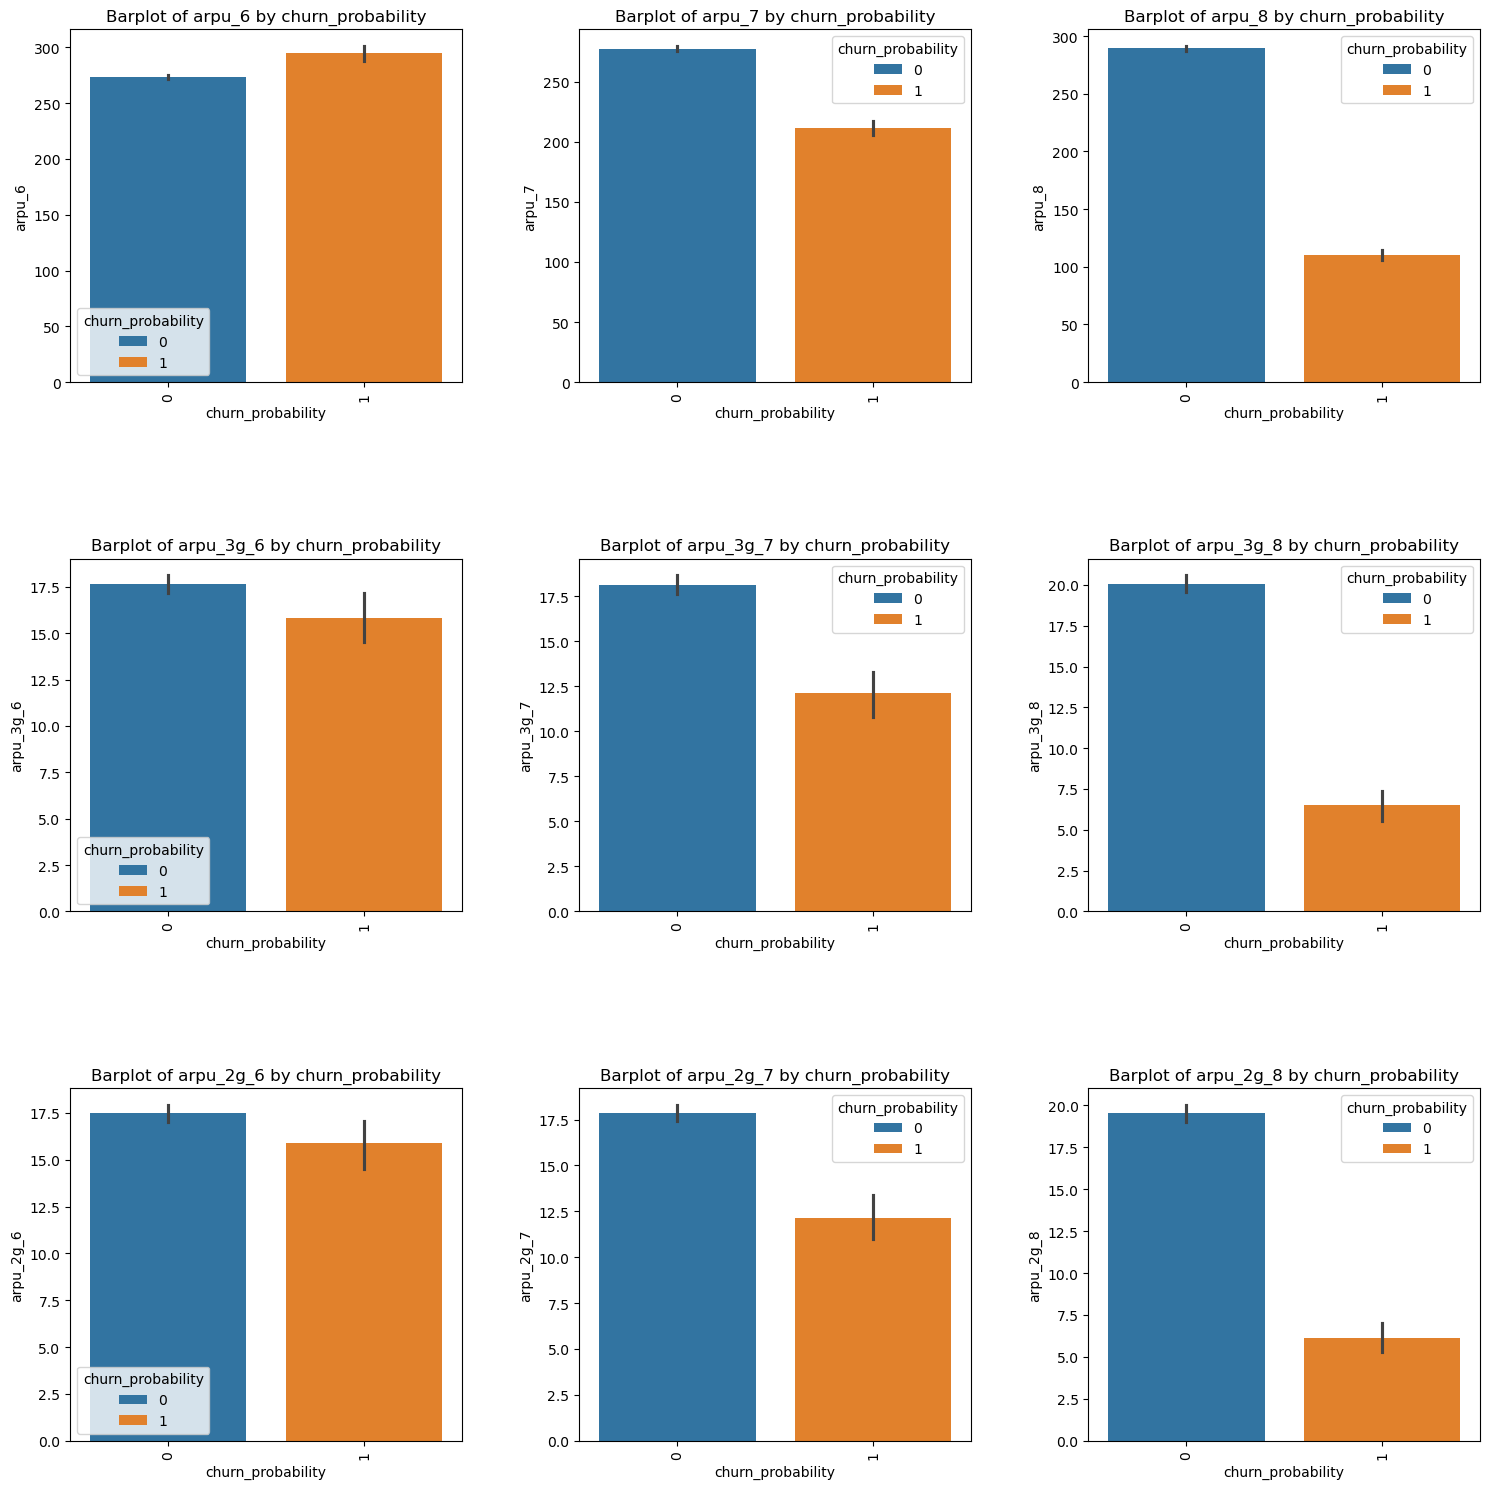

In [81]:
arpu_col = high_value_customers_train.columns[high_value_customers_train.columns.str.contains('arpu')].to_list()
visualise_target_var('barplot', high_value_customers_train, arpu_col, hue='churn_probability')

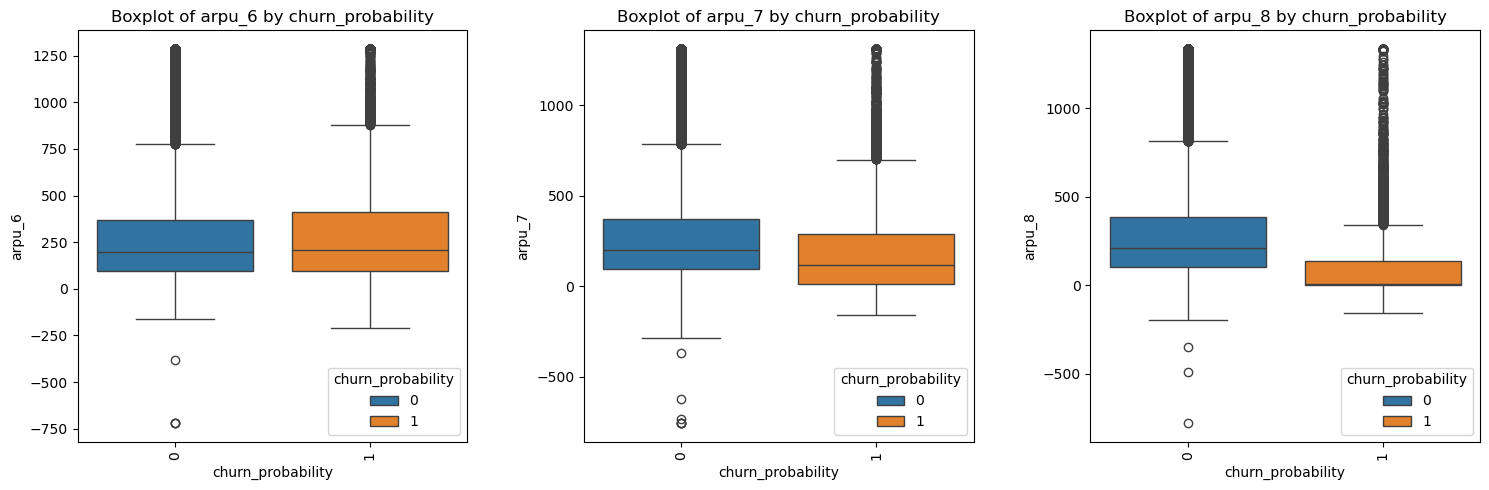

In [82]:
# boxplot
visualise_target_var('boxplot', high_value_customers_train, ['arpu_6','arpu_7','arpu_8'], hue='churn_probability')

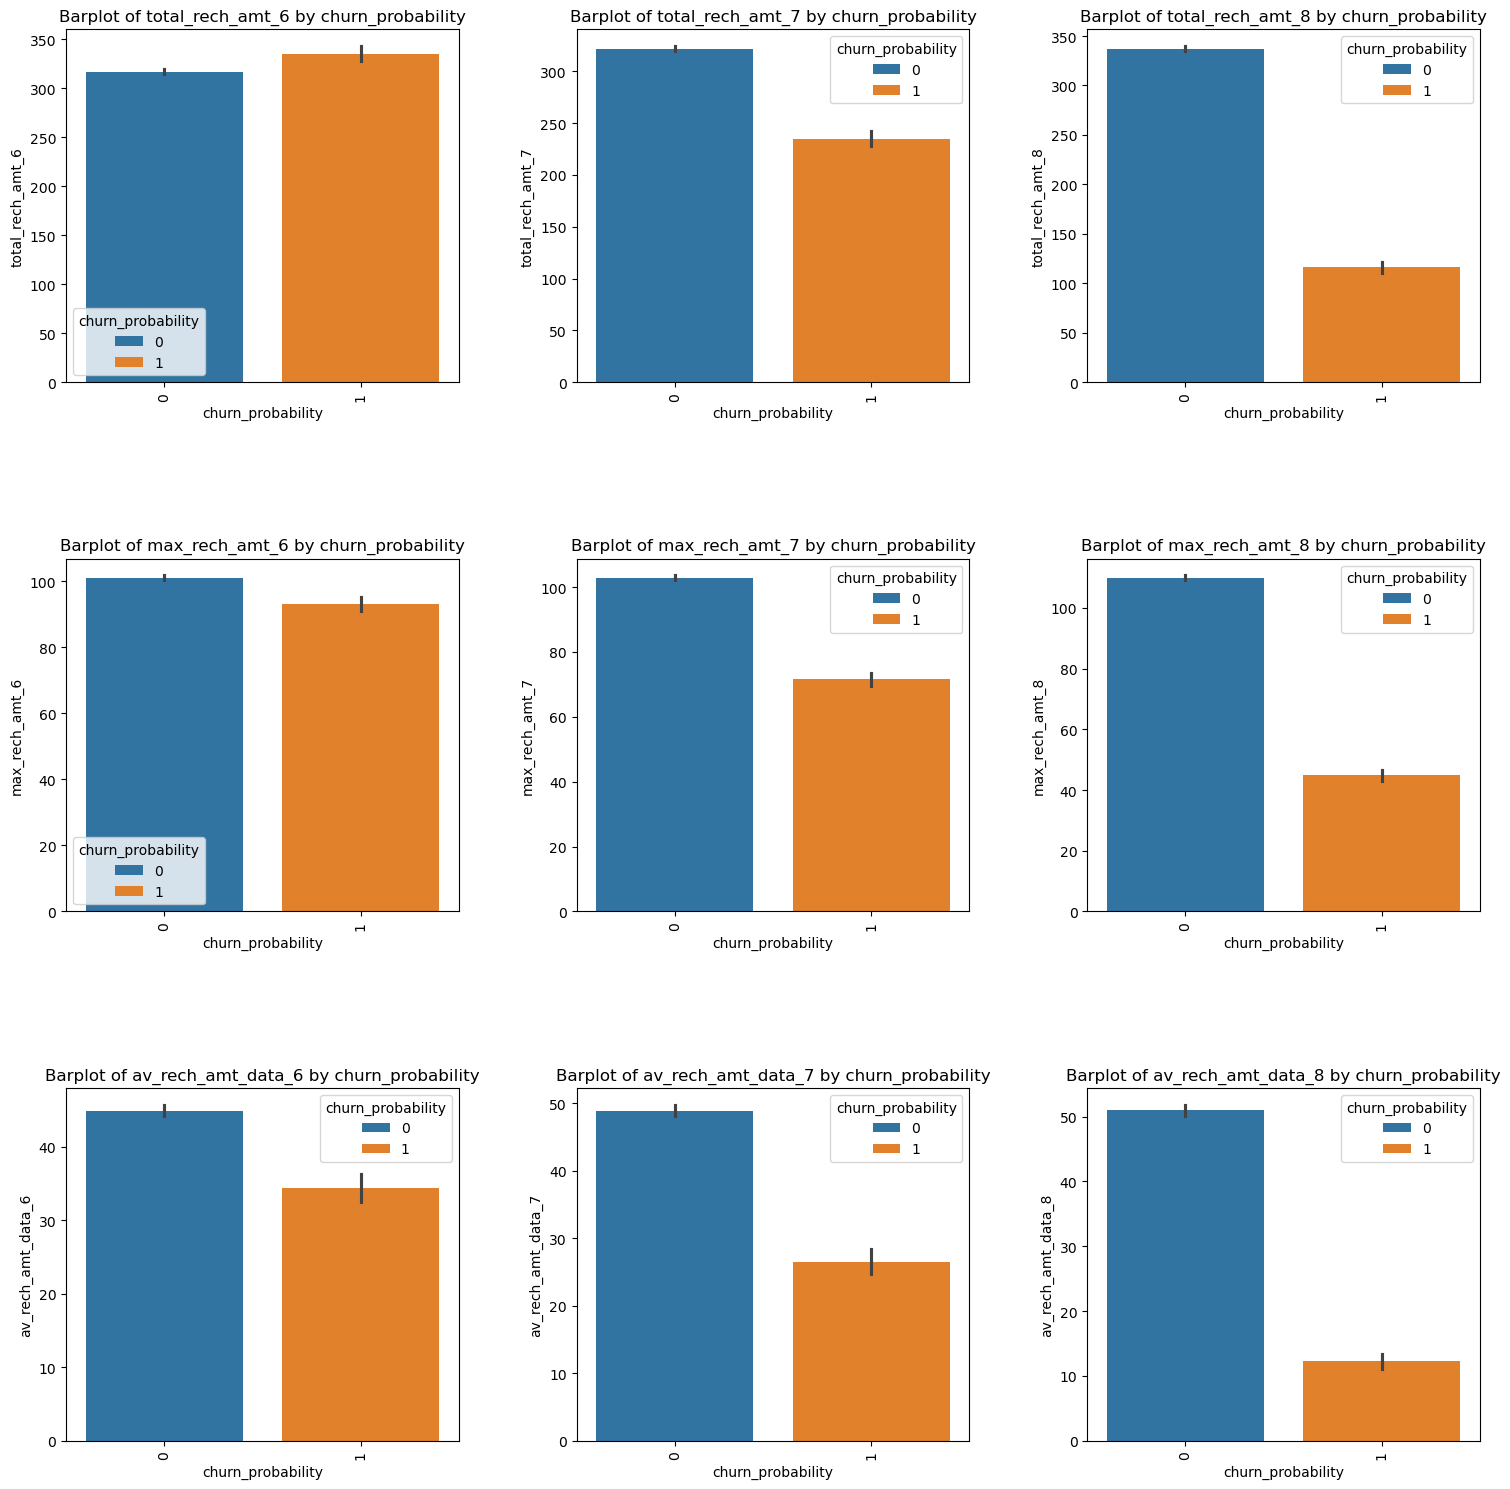

In [83]:
rech_amt = high_value_customers_train.columns[high_value_customers_train.columns.str.contains('rech_amt')].to_list()
visualise_target_var('barplot', high_value_customers_train, rech_amt, hue='churn_probability')

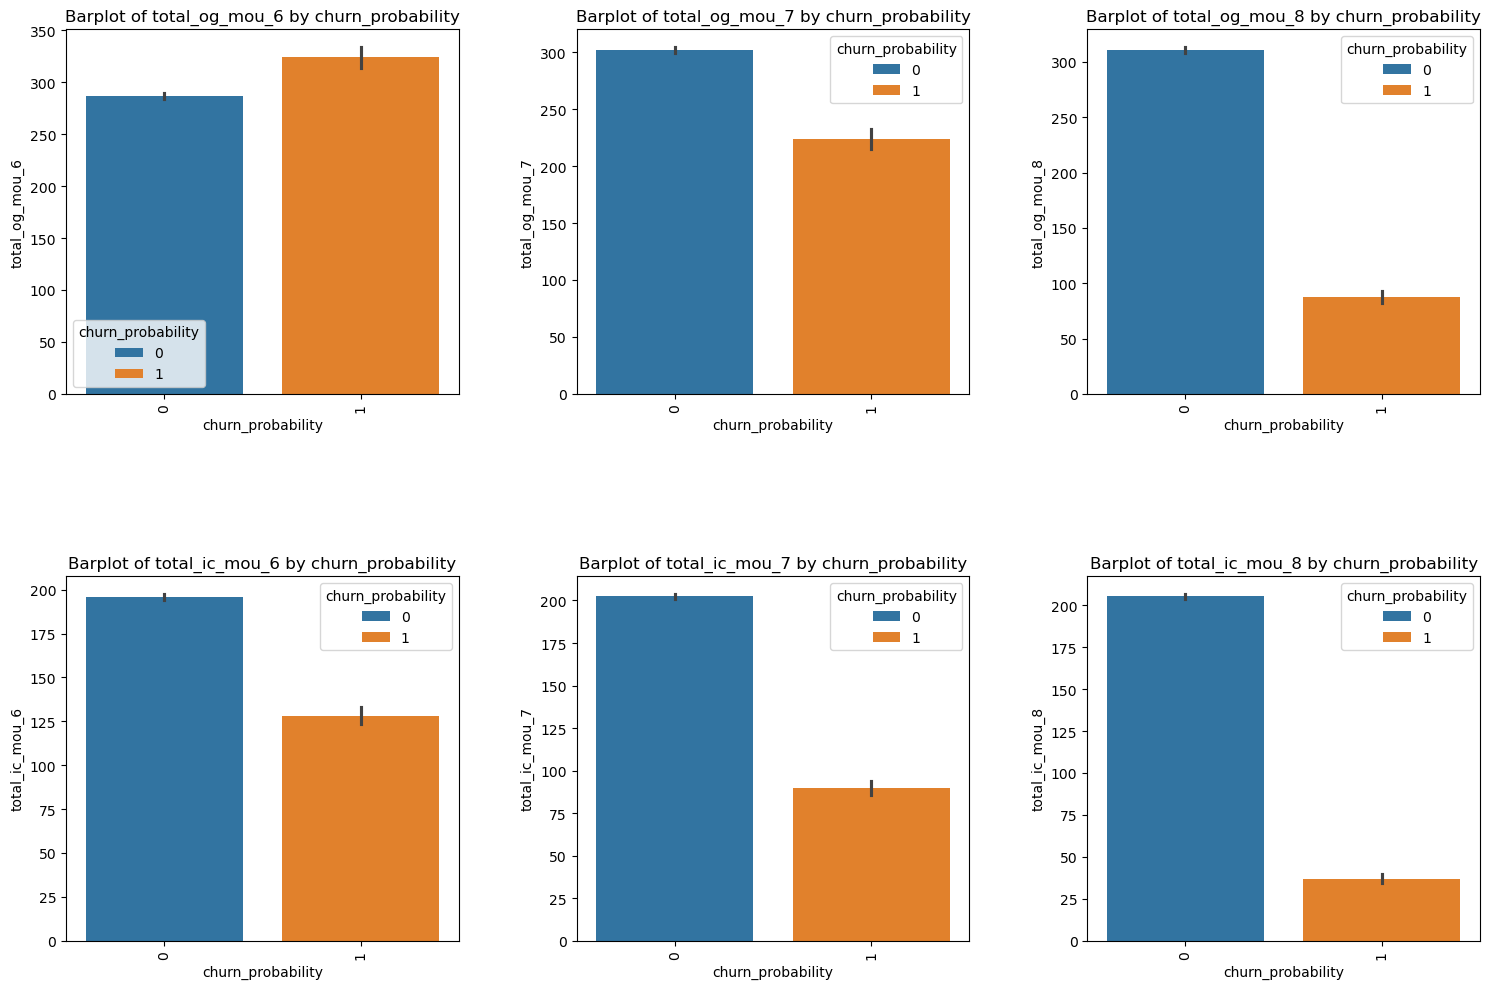

In [84]:
mou = high_value_customers_train.columns[high_value_customers_train.columns.str.contains('total_og_mou|total_ic_mou')].to_list()
visualise_target_var('barplot', high_value_customers_train, mou, hue='churn_probability')

**So we can clearly see that in churn phase there is a decline in average revenue,minutes of usage etc**

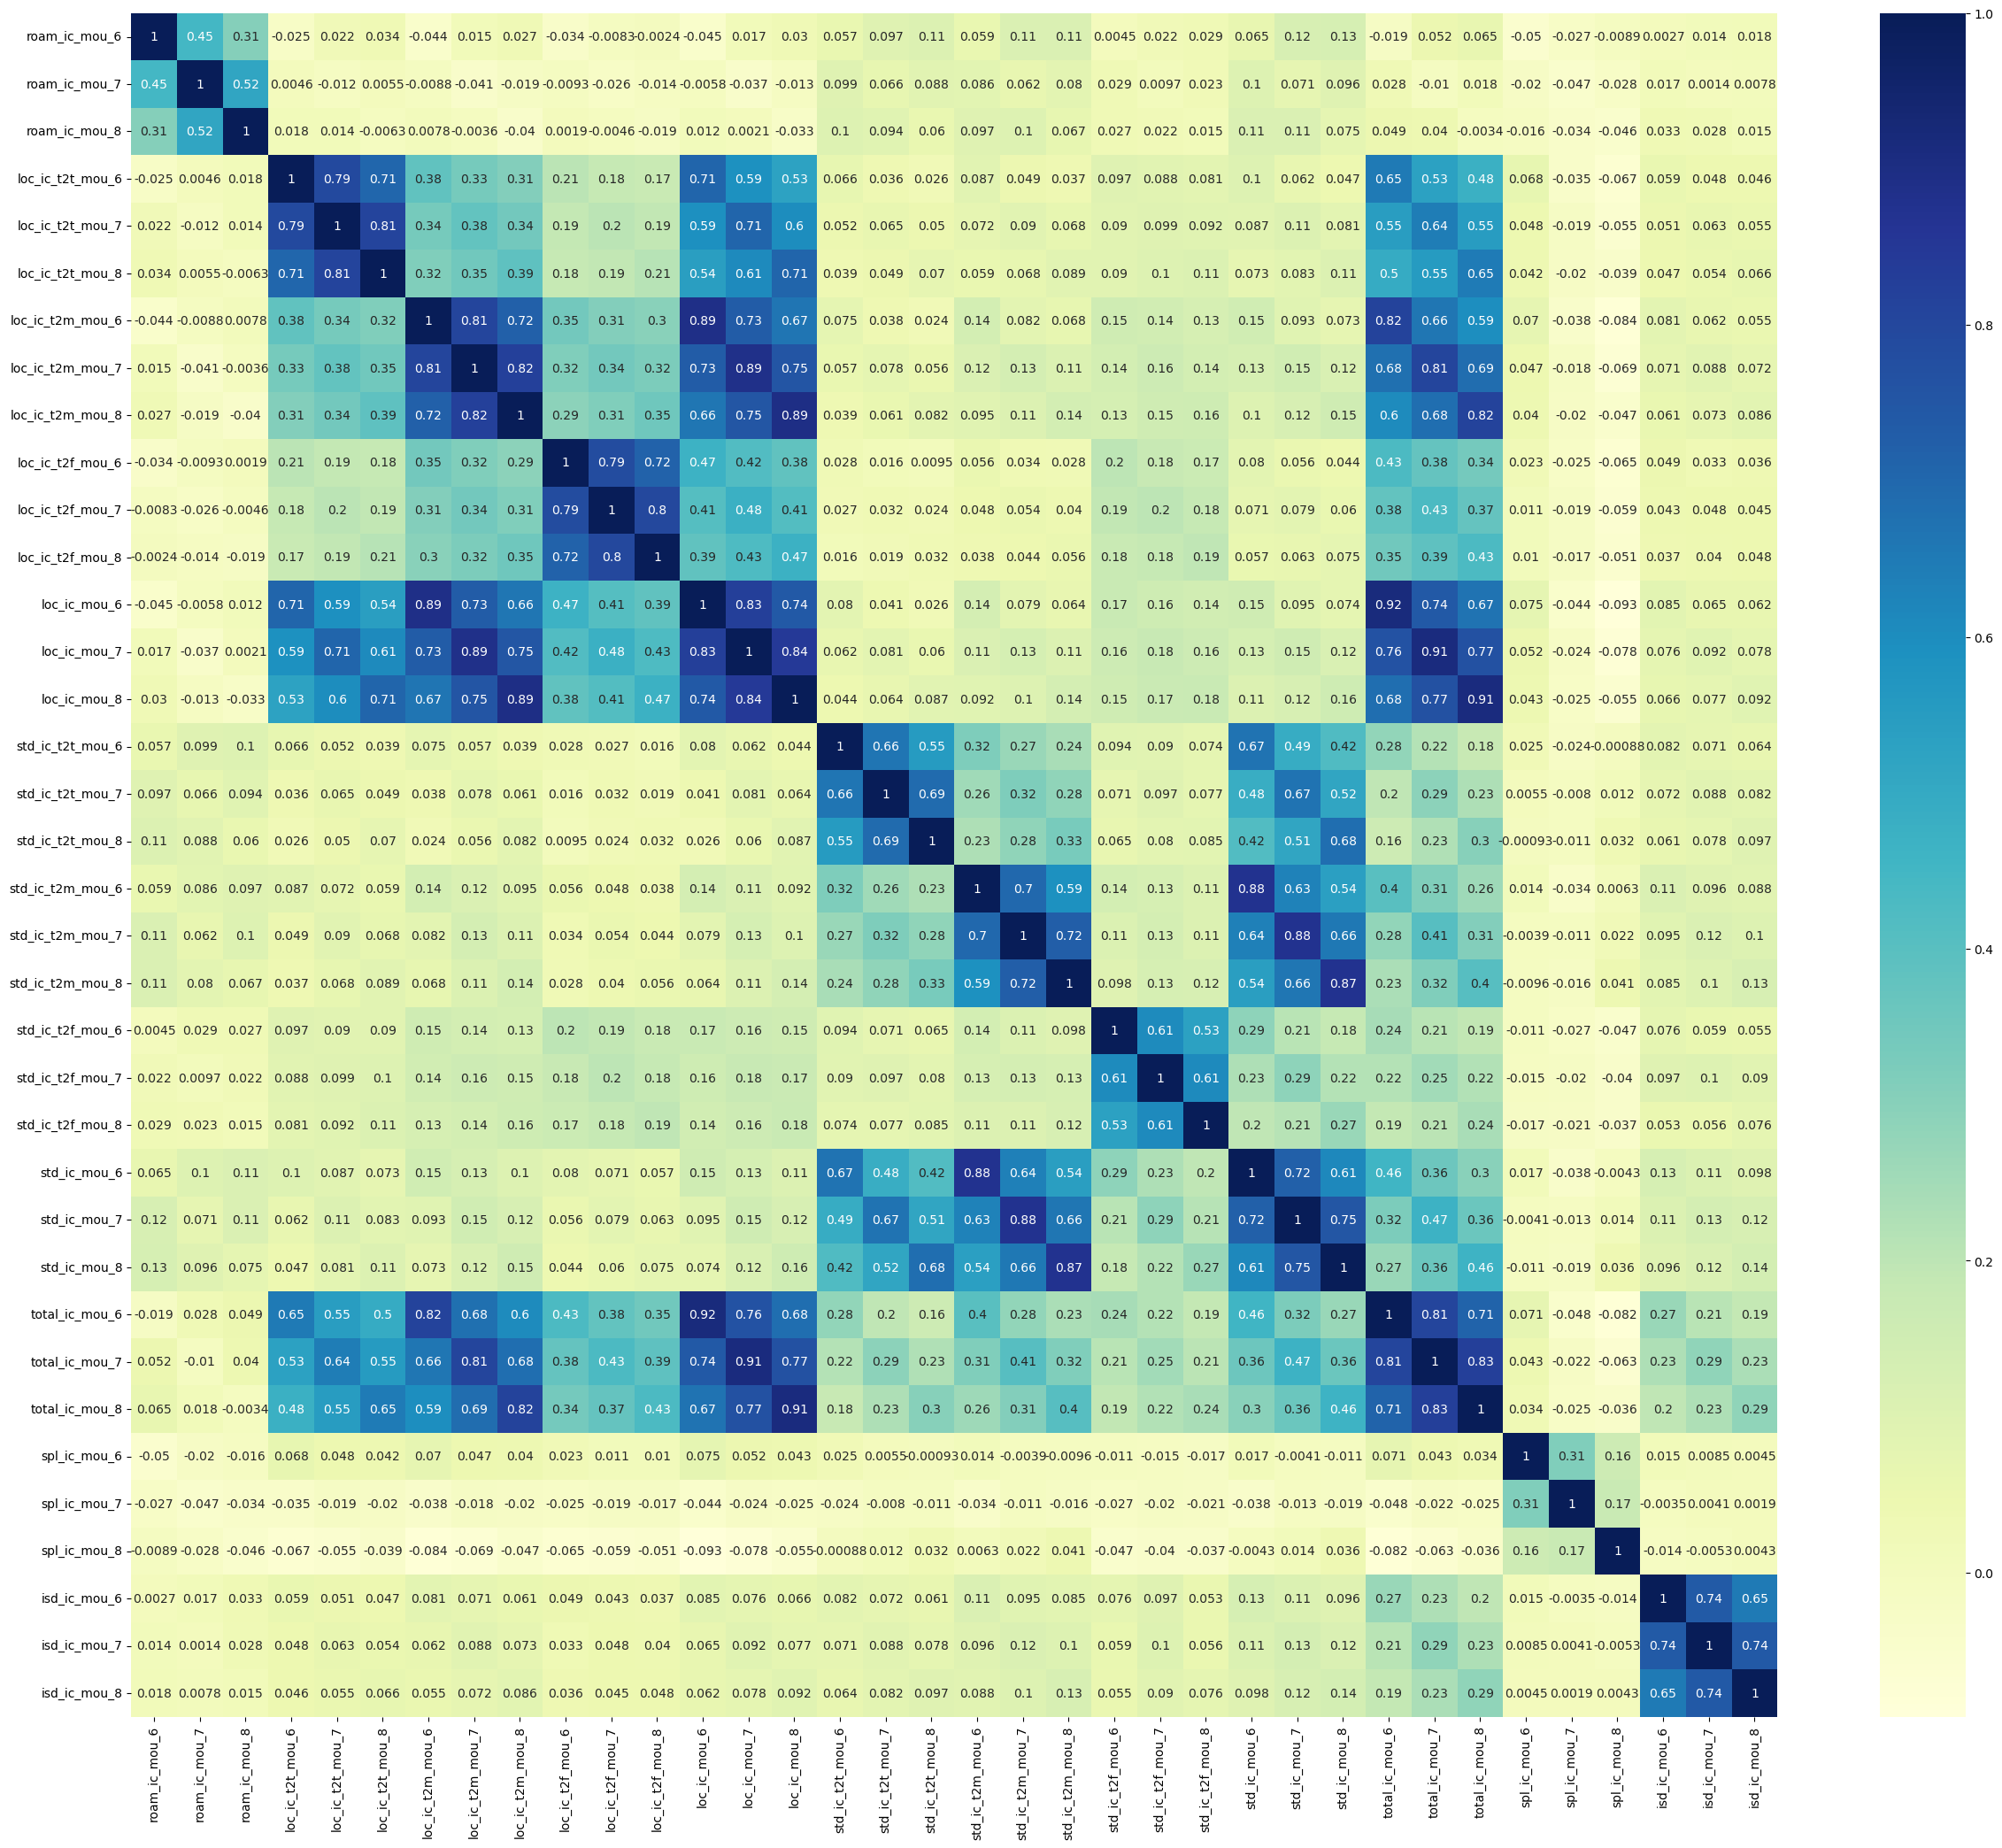

In [85]:
# heatmap for float ic minutes
plt.figure(figsize=(30,25))
sns.heatmap(ic_mou_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

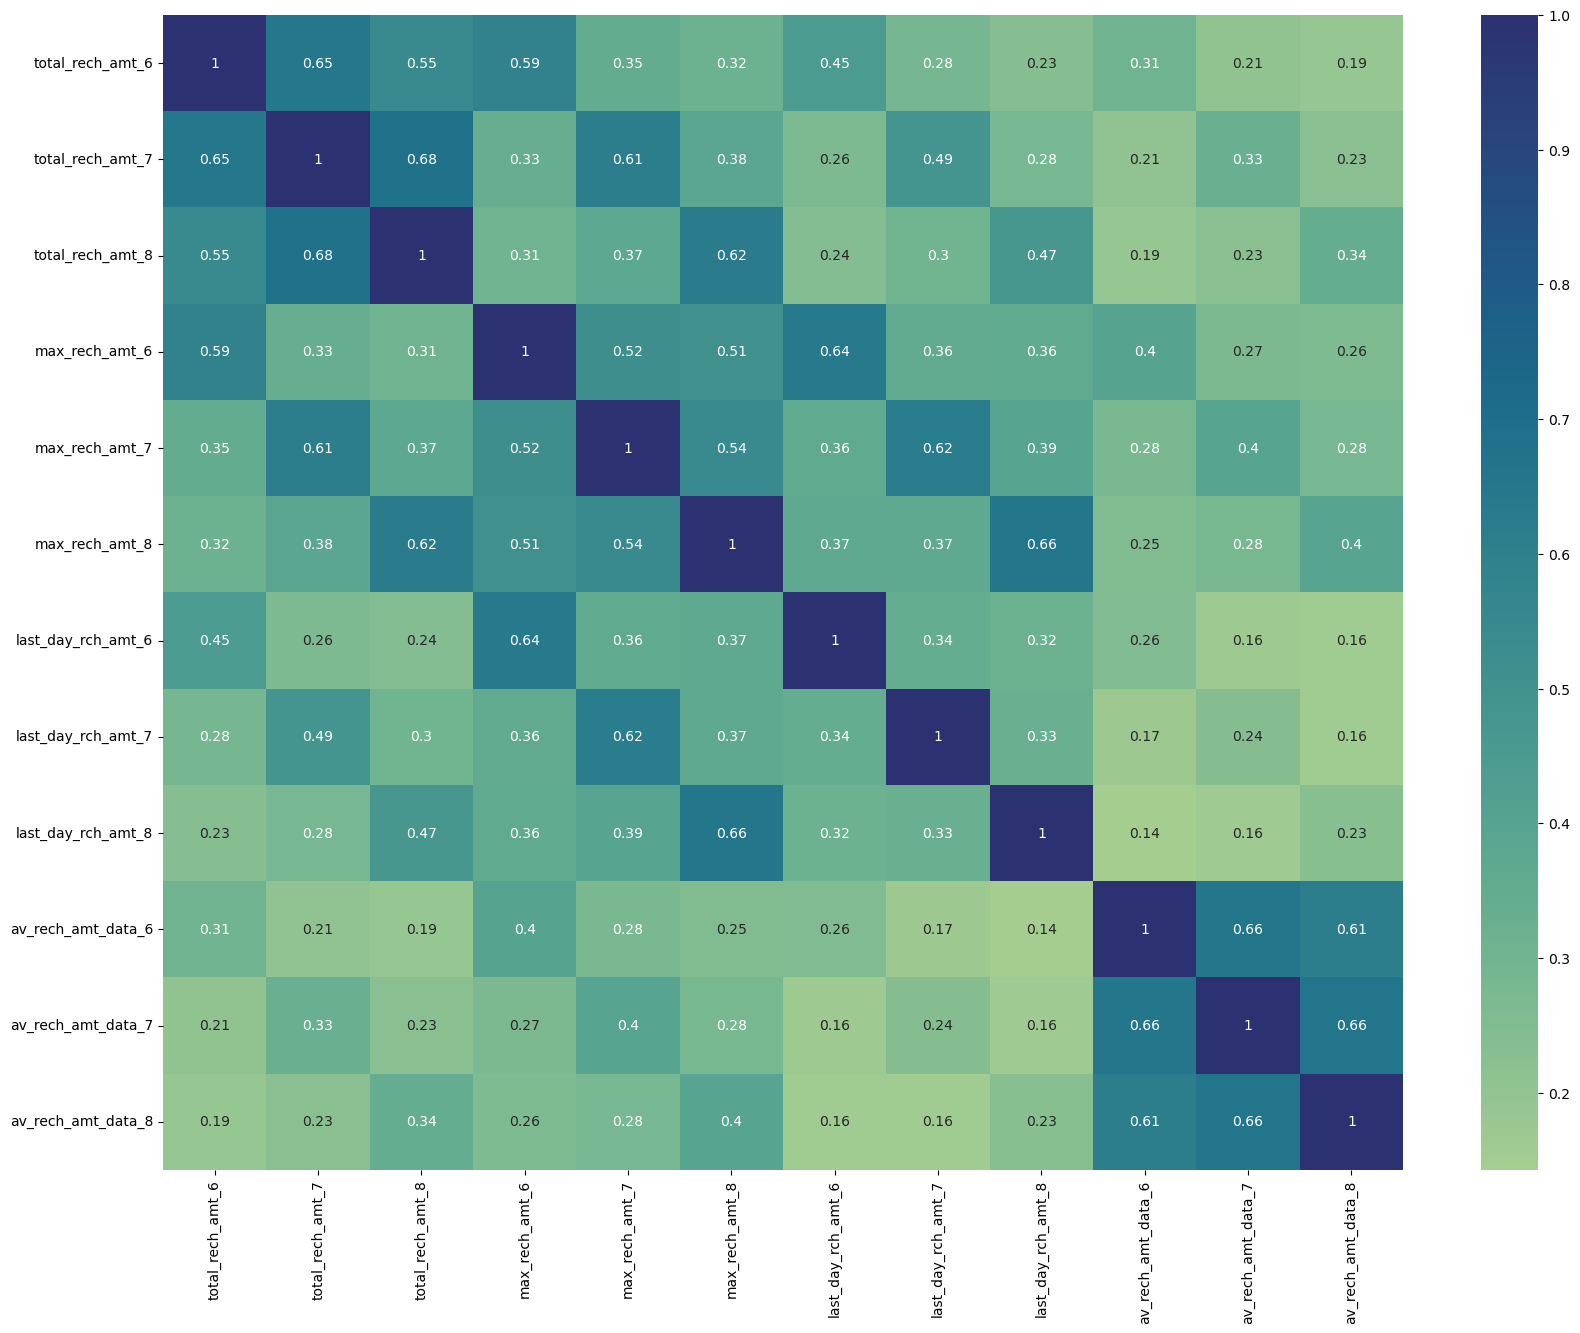

In [86]:
# heatmap for float amount data
plt.figure(figsize=(20,15))
sns.heatmap(amount_data.corr(),annot=True,cmap='crest')
plt.show()

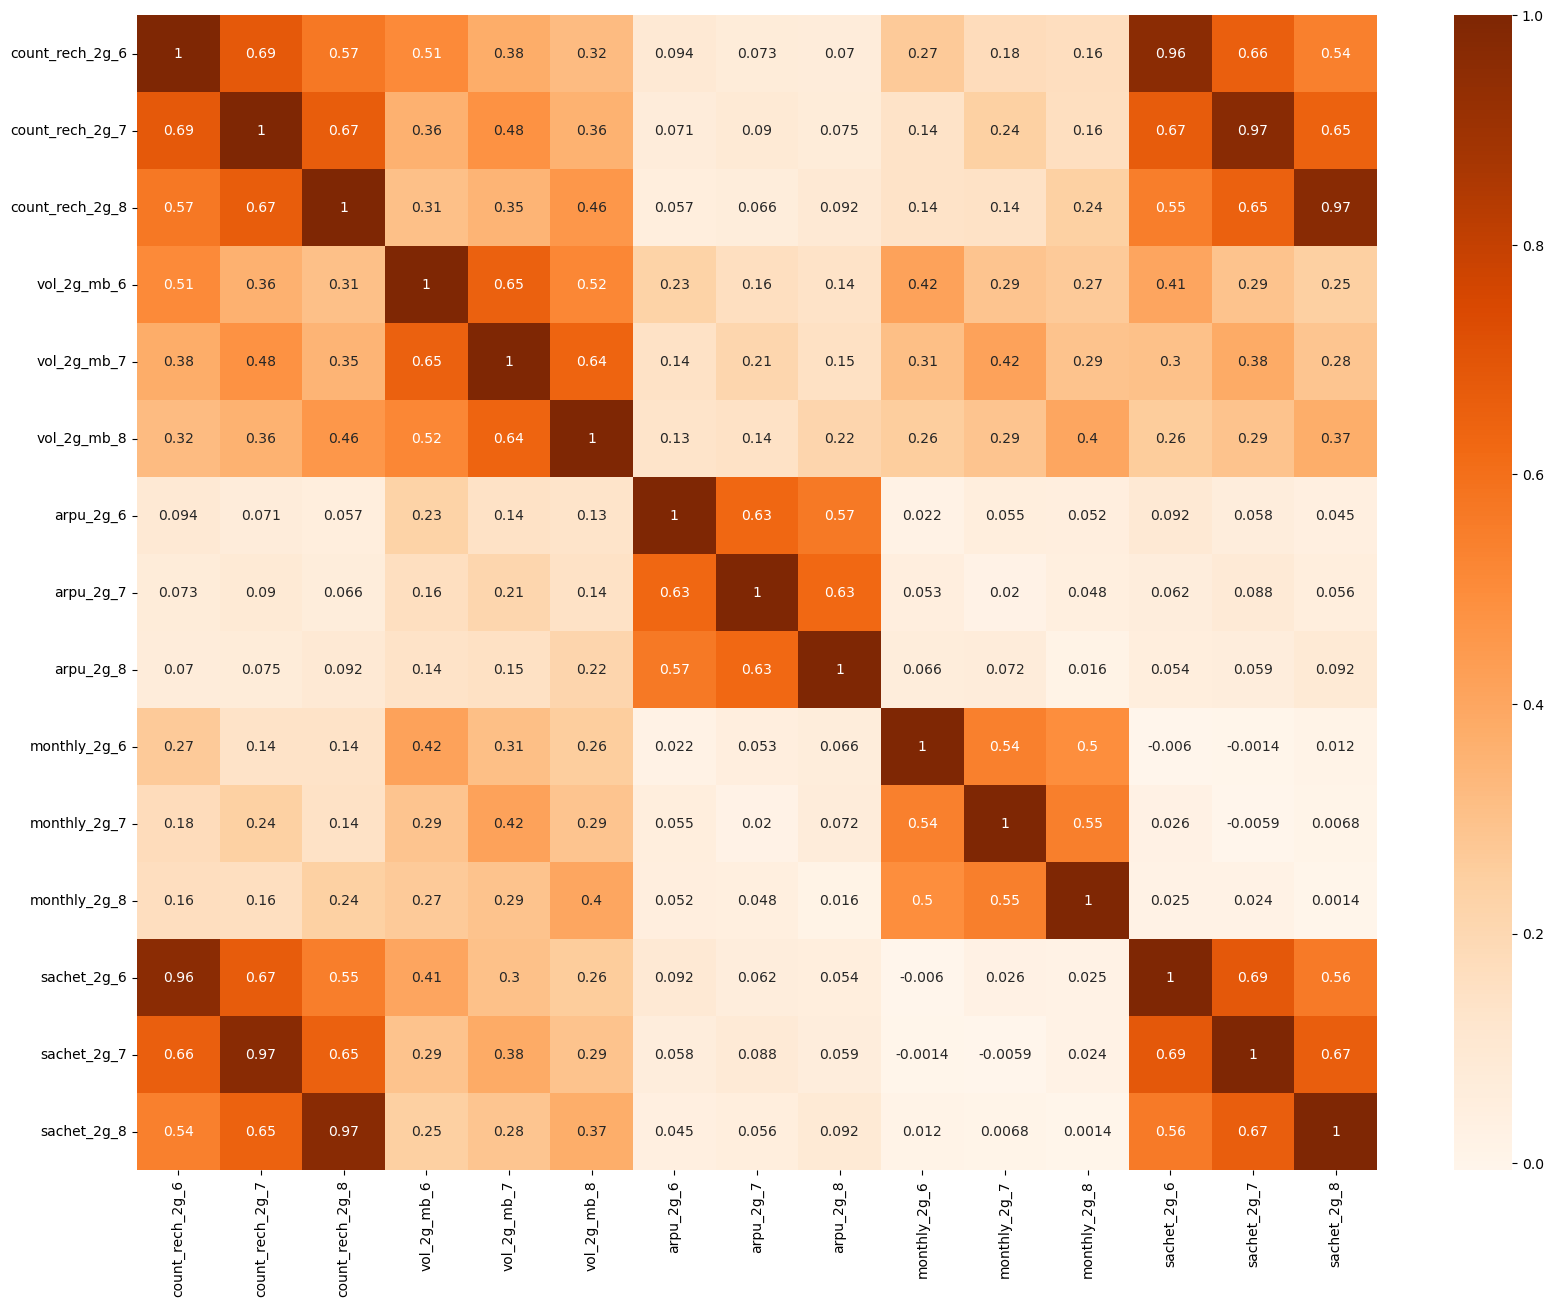

In [87]:
# heatmap for float 2g data
plt.figure(figsize=(20,15))
sns.heatmap(data2g.corr(),annot=True,cmap='Oranges')
plt.show()

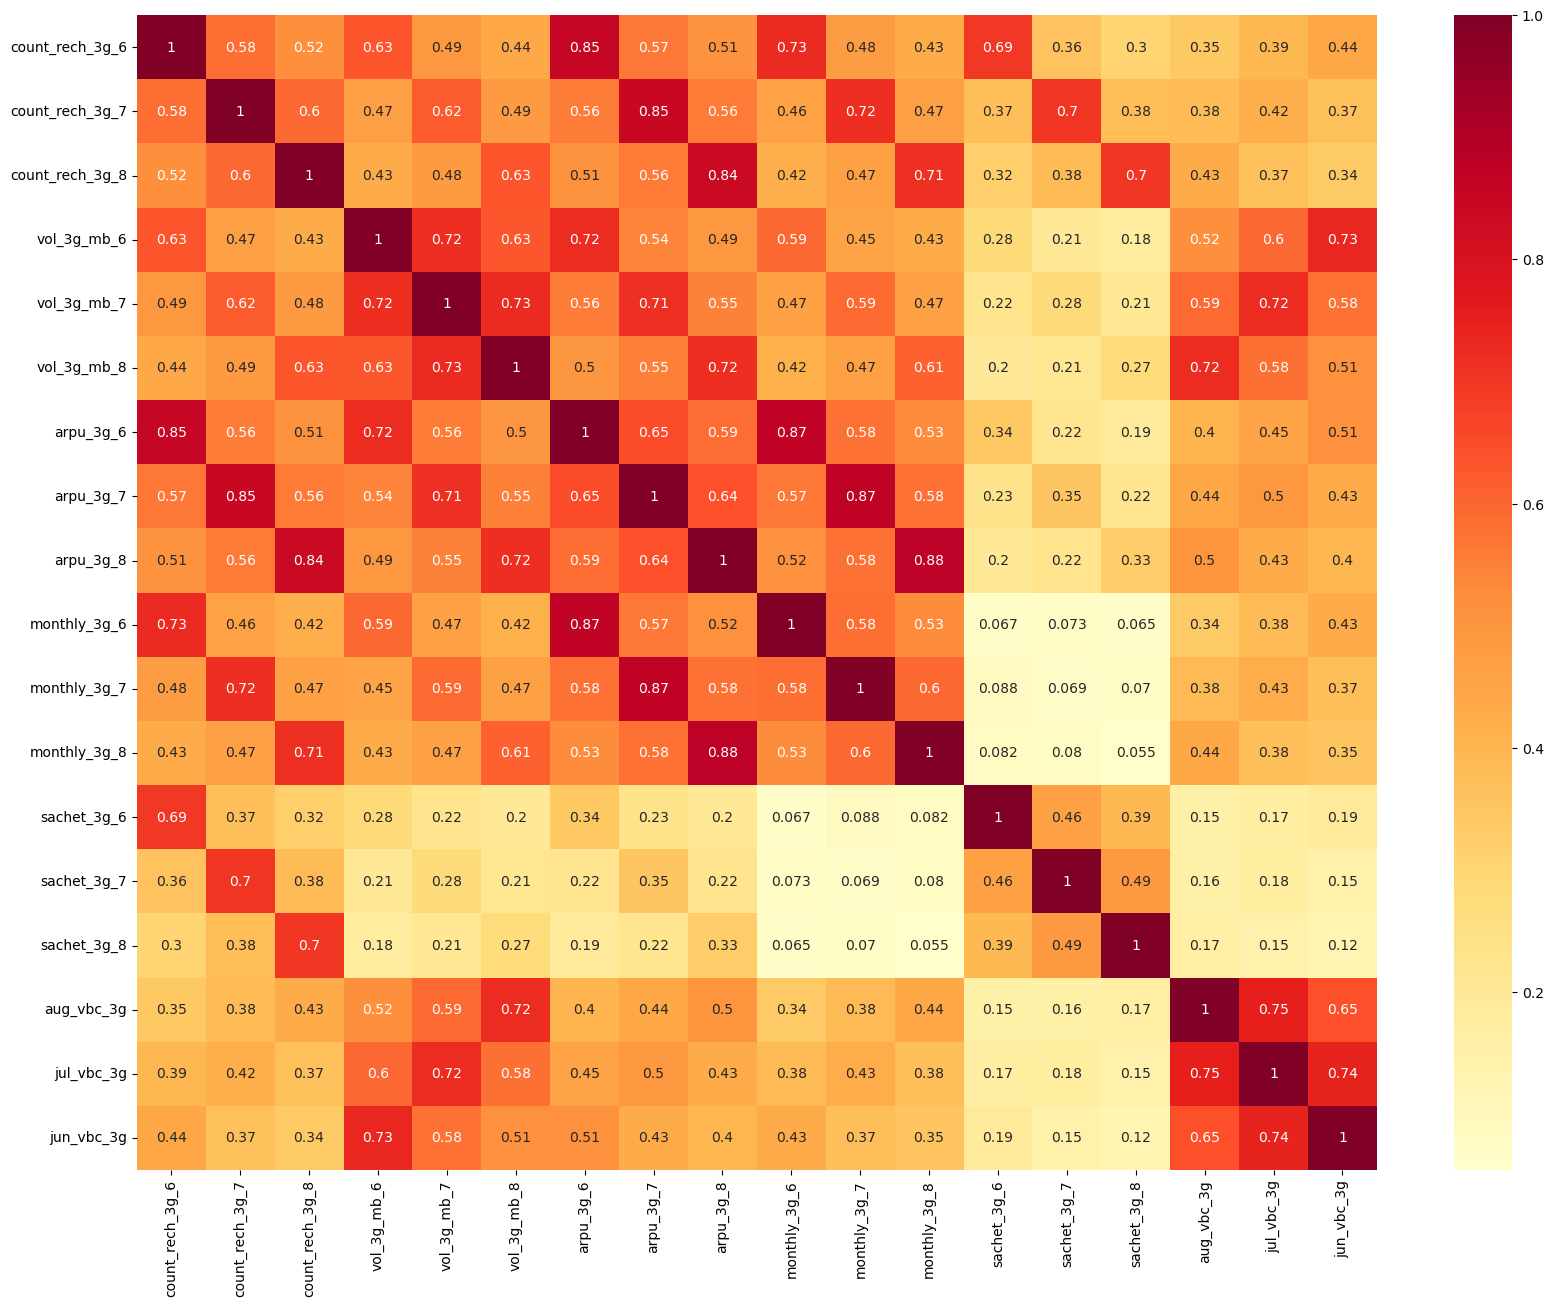

In [88]:
# heatmap for float 3g data
plt.figure(figsize=(20,15))
sns.heatmap(data3g.corr(),annot=True,cmap='YlOrRd')
plt.show()

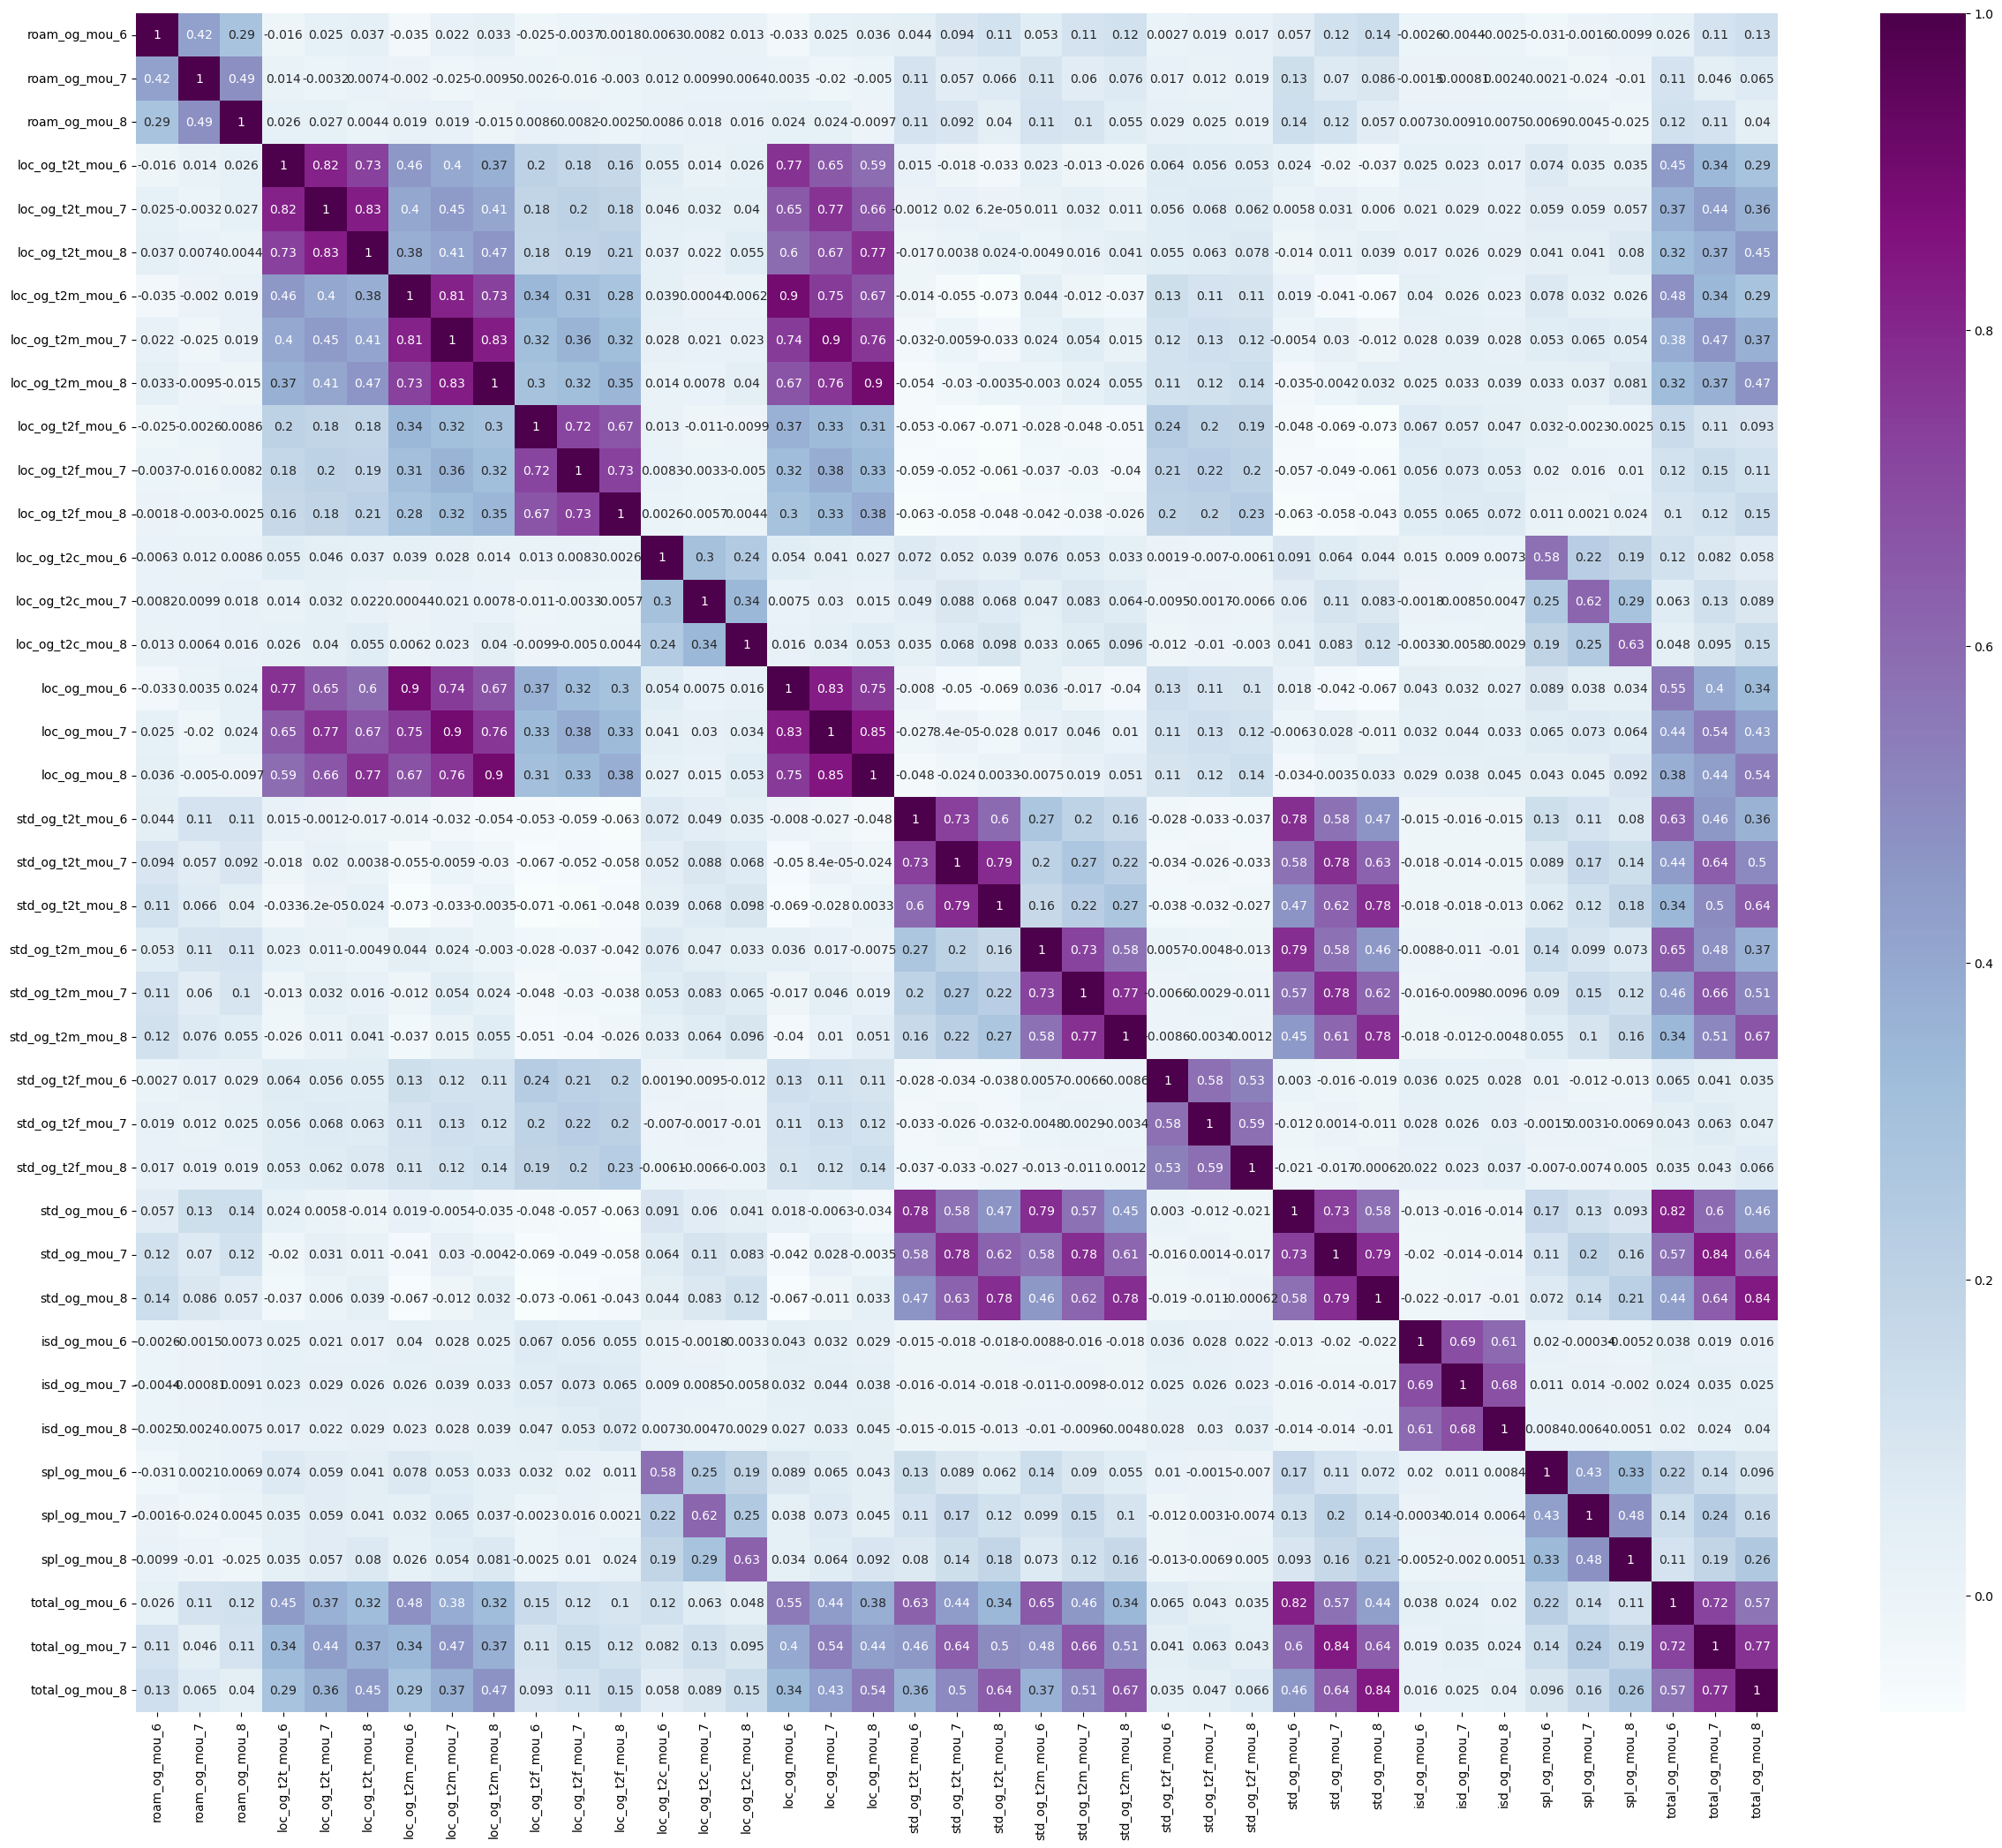

In [89]:
# heatmap for float og min data
plt.figure(figsize=(30,25))
sns.heatmap(og_mou_data.corr(),annot=True,cmap='BuPu')
plt.show()

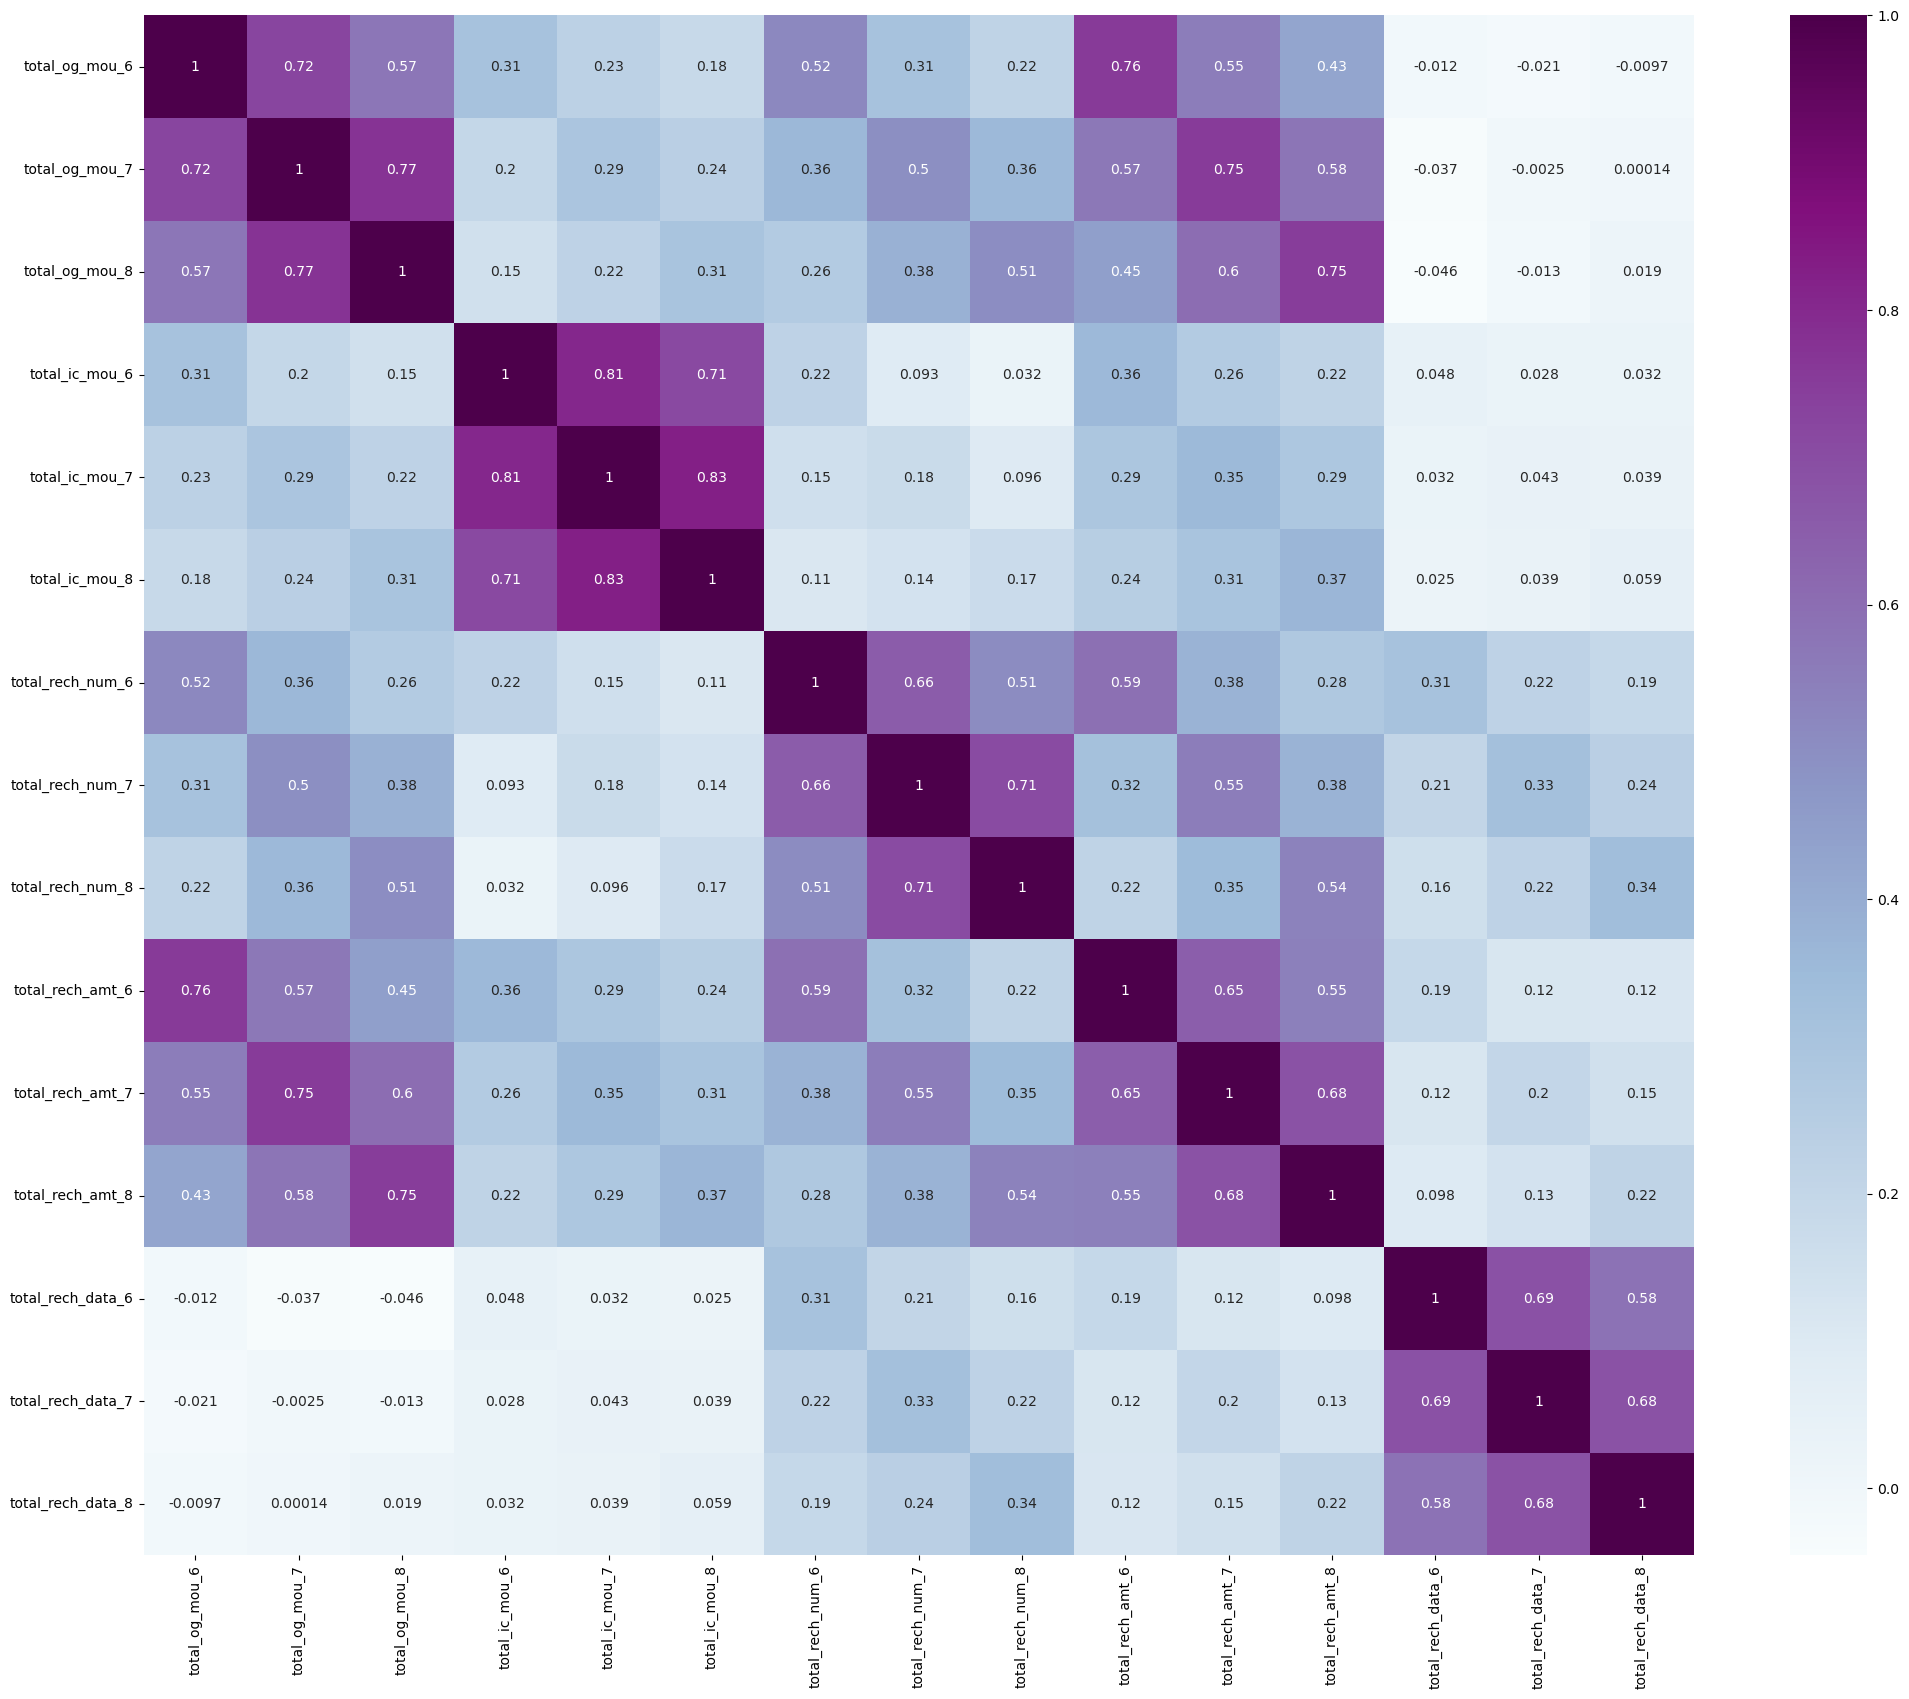

In [90]:
# heatmap for float total data
plt.figure(figsize=(25,20))
sns.heatmap(total_data.corr(),annot=True,cmap='BuPu')
plt.show()

***Observations:*** <br/><br/>
The following variables or features exhibit a remarkably high correlation:

1. total_ic_mou_6 and loc_ic_mou_6
2. total_ic_mou_7 and loc_ic_mou_7
3. total_ic_mou_8 and loc_ic_mou_8
4. std_ic_mou_6 and std_ic_t2f_mou_6
5. std_ic_mou_7 and std_ic_t2f_mou_7
6. std_ic_mou_8 and std_ic_t
7. isd_og_mou_7 and isd_og_mou_6
8. isd_og_mou_8 and isd_og_mou_6
9. isd_og_mou_8 and isd_og_mou_7
10. total_og_mou_6 and std_og_mou_6
11. total_og_mou_7 and std_og_mou_7
12. total_og_mou_8 and std_og_mou_8mou_82f_mou_8

# 5 Feature Engineering

In [91]:
high_value_customers_train['std_arpu'] = high_value_customers_train[['arpu_6', 'arpu_7']].std(axis=1)
high_value_customers_train['arpu_change_7_6'] = high_value_customers_train['arpu_7'] - high_value_customers_train['arpu_6']

# Interaction Features
high_value_customers_train['total_mou'] = high_value_customers_train[['total_og_mou_6', 'total_og_mou_7']].sum(axis=1)

# Ratio Features
high_value_customers_train['total_rech_amt'] = high_value_customers_train[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].sum(axis=1)
high_value_customers_train['arpu_6_7'] = high_value_customers_train[['arpu_6', 'arpu_7']].mean(axis=1)

# Calculate the ratio of total outgoing amount to age on network
high_value_customers_train['avg_daily_usage'] = high_value_customers_train['total_rech_amt'] / high_value_customers_train['aon']

In [92]:
high_value_customers_test['std_arpu'] = high_value_customers_test[['arpu_6', 'arpu_7']].std(axis=1)
high_value_customers_test['arpu_change_7_6'] = high_value_customers_test['arpu_7'] - high_value_customers_test['arpu_6']

# Interaction Features
high_value_customers_test['total_mou'] = high_value_customers_test[['total_og_mou_6', 'total_og_mou_7']].sum(axis=1)

# Ratio Features
high_value_customers_test['total_rech_amt'] = high_value_customers_test[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].sum(axis=1)
high_value_customers_test['arpu_6_7'] = high_value_customers_test[['arpu_6', 'arpu_7']].mean(axis=1)

# Calculate the ratio of total outgoing amount to age on network
high_value_customers_test['avg_daily_usage'] = high_value_customers_test['total_rech_amt'] / high_value_customers_test['aon']

In [93]:
# # filter data if we have to calculate high value customer 70,75 percentile
# percentile_75_train = high_value_customers_train['arpu_6_7'].quantile(0.75)

# high_value_customers_train = high_value_customers_train[
#     high_value_customers_train['arpu_6_7'] >= percentile_75_train
# ]

In [94]:
high_value_customers_train.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_m

# 6 Model Selection + PCA + Model Building

In [95]:
y_train = high_value_customers_train['churn_probability'].astype('int64')
X_train = high_value_customers_train.drop('churn_probability',axis=1)

In [96]:
# handle class imbalence using smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [97]:

# # Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_resampled)
features_scaled

array([[-0.92733577, -0.58356618, -0.74860597, ..., -0.86237162,
        -0.84847023, -0.71796958],
       [-1.04336528, -0.44760624, -0.60745857, ..., -0.8069392 ,
        -0.83900655, -0.61029919],
       [-0.81779089, -0.52212998, -0.77859571, ..., -0.81338483,
        -0.75239114, -0.64266758],
       ...,
       [-1.04336528, -0.6516155 , -0.39314419, ..., -0.80110315,
        -0.95188361, -0.53139461],
       [ 1.72700909,  1.28279709,  0.8976819 , ...,  1.53972522,
         1.6885817 ,  3.76153583],
       [-0.88258727, -0.15175864, -0.68350898, ..., -0.63922908,
        -0.58419166, -0.29884744]])

In [98]:
# Retains components explaining 90% variance
pca = PCA(n_components=0.90,random_state=42)
features_pca = pca.fit_transform(features_scaled)

# Check the number of components chosen
print(f"Number of components chosen: {pca.n_components_}")

Number of components chosen: 56


In [99]:
features_pca.shape

(125734, 56)

#### Scree plot

In [100]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

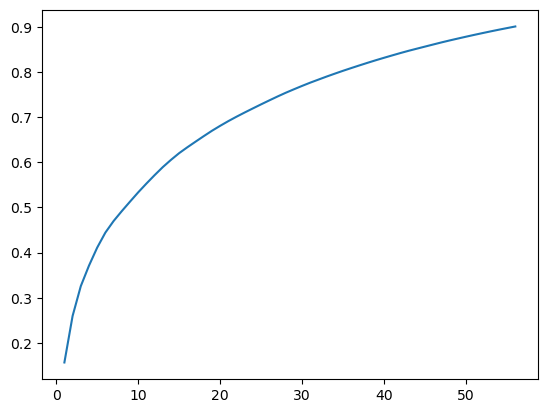

In [101]:
plt.plot(range(1,len(var_cumu)+1),var_cumu)

In [102]:
pca_train = pd.DataFrame(features_pca,columns= [f"pc_{i}" for i in range(1,features_pca.shape[1]+1)])
pca_train.head()

pc_1      pc_2      pc_3       pc_4      pc_5      pc_6      pc_7  \
0 -4.196320  0.060334  0.078011  -0.308599 -1.230569  0.154584 -0.753982   
1 -2.125192  3.315605 -1.022136   0.486997 -2.698578 -1.009243 -2.166568   
2 -4.221359  0.332737  0.635463  -0.495749 -0.373219  0.062038 -0.457058   
3 -2.729770 -0.066684  0.691197  -0.302229 -0.978104 -0.809890 -0.359162   
4  1.563042  8.189351 -3.196825  13.110299  2.579424  0.316576  2.991854   

       pc_8      pc_9     pc_10     pc_11     pc_12     pc_13     pc_14  \
0 -0.246252 -0.472043 -0.313594 -0.096320 -0.044717  0.019183 -0.240964   
1 -1.725312  1.089739 -2.507473 -3.236221 -0.025331 -0.584194  5.168365   
2 -0.336423 -0.149533 -0.184063 -0.387959 -0.330781 -0.135221 -0.329555   
3 -0.616743 -0.167230 -0.229384  0.127350  0.174924 -0.000354  1.891843   
4 -0.859323  1.817298 -0.832618 -0.009209  2.614111 -2.343524 -2.076442   

      pc_15     pc_16     pc_17     pc_18     pc_19     pc_20     pc_21  \
0  0.211945 -0.043448 -0.574092  0.285603  0.150744  0.158372 -0.109898   
1  4.481493  0.672715  0.123907 -1.423281 -3.094332  2.722905 -1.907343   
2  0.130071  0.103531 -0.351988  0.001797  0.480183  0.167696 -0.151220   
3  1.473476  0.526955 -0.582521 -0.527870  0.043409  0.792194 -0.635969   
4 -0.691260  1.067782 -1.087878 -1.089958 -1.894560  2.282272  0.086551   

      pc_22     pc_23     pc_24     pc_25     pc_26     pc_27     pc_28  \
0 -0.138900  0.888791  0.869236  0.097662 -0.296059  0.174486 -1.349066   
1 -2.418437  0.067398 -0.972606 -0.445366  0.752383 -0.935559  0.455593   
2 -0.425705 -0.525542 -0.090291 -0.013279  0.297535  0.005060 -0.181642   
3 -1.457462 -0.774198  0.058580 -0.293166  0.612144  0.147486 -0.681055   
4 -1.784760 -0.066544 -0.190405  0.254049 -0.600370  0.718274 -0.419340   

      pc_29     pc_30     pc_31     pc_32     pc_33     pc_34     pc_35  \
0  0.405401 -0.004064 -0.703197 -0.081197  0.413562 -0.874412  1.004840   
1 -1.461669  0.739560  0.248351  5.118271 -1.279120 -0.754337  0.160302   
2 -0.085661  0.024189  0.136697 -0.567683  0.134878 -0.357973 -0.126288   
3 -0.437941  0.182833  0.011346  1.285645 -0.682396 -0.797951 -1.150635   
4 -0.653629  0.141485  0.017858  0.028795 -0.652974  0.782757  0.437349   

      pc_36     pc_37     pc_38     pc_39     pc_40     pc_41     pc_42  \
0 -0.522921  0.005070 -0.559827 -1.999418  4.085136 -1.631751  1.093353   
1 -1.160291  0.570194 -0.332045  2.198263  0.124537  0.827224  0.251842   
2  0.281196  0.412371 -0.164183 -0.384856 -0.067016 -0.008949 -0.011465   
3 -1.133341  0.048597  0.375631 -1.087597 -0.951447 -1.028910  0.230539   
4  1.059659  0.006469  0.437418  2.911578  1.392612  0.805811 -0.242996   

      pc_43     pc_44     pc_45     pc_46     pc_47     pc_48     pc_49  \
0 -0.089561 -0.438224 -0.834384 -0.943120  0.548257  0.377895 -0.346488   
1  0.272664  0.448238 -0.181362 -0.033038 -1.078105 -0.657491 -0.097571   
2  0.129007 -0.222558  0.138059  0.218409  0.002729 -0.347721  0.095981   
3  0.112123 -0.533870  0.360362  0.262286  0.029154 -0.363988  0.259498   
4  0.653212 -0.143738  0.330418  0.024397  0.373015  0.191121 -0.038902   

      pc_50     pc_51     pc_52     pc_53     pc_54     pc_55     pc_56  
0  0.222327 -0.230372  0.235286 -0.218545  0.184020  0.015495  0.150329  
1 -0.126217  0.348256  0.093916 -0.739739 -0.279110 -0.034918  0.414684  
2 -0.295531  0.110809 -0.050986  0.335585  0.239615 -0.077063  0.423620  
3 -0.017927 -0.298581 -0.104045  0.338730  0.320466 -0.054913 -0.321749  
4  0.506936 -0.152793 -0.395376  0.743922 -0.011130  0.151263 -0.018812

In [103]:
pca_train = pd.concat([pca_train,y_resampled],axis=1)
pca_train.shape

(125734, 57)

In [104]:
pca_train.columns

Index(['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9',
       'pc_10', 'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 'pc_16', 'pc_17',
       'pc_18', 'pc_19', 'pc_20', 'pc_21', 'pc_22', 'pc_23', 'pc_24', 'pc_25',
       'pc_26', 'pc_27', 'pc_28', 'pc_29', 'pc_30', 'pc_31', 'pc_32', 'pc_33',
       'pc_34', 'pc_35', 'pc_36', 'pc_37', 'pc_38', 'pc_39', 'pc_40', 'pc_41',
       'pc_42', 'pc_43', 'pc_44', 'pc_45', 'pc_46', 'pc_47', 'pc_48', 'pc_49',
       'pc_50', 'pc_51', 'pc_52', 'pc_53', 'pc_54', 'pc_55', 'pc_56',
       'churn_probability'],
      dtype='object')

In [105]:
X_train_standerd = pca_train.drop('churn_probability',axis=1)
y_train_standerd = pca_train['churn_probability']

In [106]:
print(X_train_standerd.shape)
print(y_train_standerd.shape)

(125734, 56)
(125734,)


### Model Selection

In [107]:
%%time

model_selection(X_train_standerd, y_train_standerd)

Model Selection Results:
Random Forest: 0.9384
XGBoost: 0.9112
Logistic Regression: 0.8370

Best Model: Random Forest with accuracy score of 0.9384
CPU times: total: 531 ms
Wall time: 3min 36s


**So we will start with `Random Forest`**

In [108]:
# train and validation set
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_standerd, y_train_standerd, test_size=0.3, random_state=42,shuffle=True)

In [109]:
logmodel = RandomForestClassifier(random_state=42)

In [ ]:
y_pred_train = logmodel.fit(X_train_pca,y_train_pca)
y_pred_train

In [ ]:
y_pred_val = logmodel.predict(X_val_pca)
y_pred_val.shape

In [ ]:
# training set
calculate_classification_metrics(y_train_pca,logmodel.predict(X_train_pca))

In [ ]:
# validation set
calculate_classification_metrics(y_val_pca,y_pred_val)

In [ ]:
y_val_pred_proba = logmodel.predict_proba(X_val_pca)[:, 1]
y_val_pred_proba

In [116]:
y_val_pred_proba.shape

(37721,)

In [ ]:
optimum_value_calculation(y_val_pca,y_val_pred_proba)

### Finding best params by regularisation(Reducing Overfitting)

In [117]:
# subsetting data 
X_train_sample = X_train_pca.sample(frac=0.5, random_state=42)  # 50% sample
y_train_sample = y_train_pca.loc[X_train_sample.index]
print(X_train_sample.shape)
print(y_train_sample.shape)

(44006, 56)
(44006,)


In [ ]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100],
    'max_depth': [30,40],
    'min_samples_split': [3],
    'max_features': ['sqrt',30],
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1,n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [123]:
# validation accuracy
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_pca)
accuracy = metrics.accuracy_score(y_val_pca, y_val_pred)
print("Accuracy of Best Model on Validation Data:", accuracy)

Accuracy of Best Model on Validation Data: 0.9143182842448504


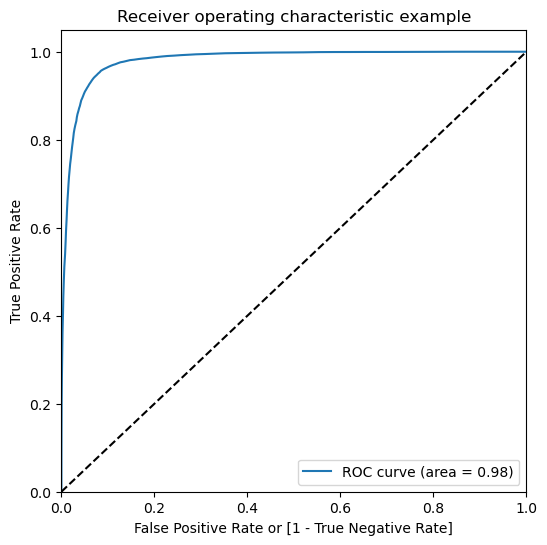

(array([0.00000000e+00, 1.05213320e-04, 3.15639960e-04, 5.78673260e-04,
        1.10473986e-03, 1.78862644e-03, 2.41990636e-03, 3.41943290e-03,
        4.15592614e-03, 5.20805934e-03, 6.31279920e-03, 7.94360566e-03,
        9.10095218e-03, 9.94265874e-03, 1.11526119e-02, 1.20995318e-02,
        1.30464517e-02, 1.42037982e-02, 1.52559314e-02, 1.63606713e-02,
        1.76232311e-02, 1.88331843e-02, 2.02535641e-02, 2.17265506e-02,
        2.31469304e-02, 2.43568836e-02, 2.55668368e-02, 2.66189700e-02,
        2.81971698e-02, 2.99331895e-02, 3.21426693e-02, 3.31948025e-02,
        3.46151823e-02, 3.66142354e-02, 3.80872218e-02, 3.96654216e-02,
        4.11910148e-02, 4.26113946e-02, 4.49260876e-02, 4.67147141e-02,
        4.85559472e-02, 5.07128202e-02, 5.31853333e-02, 5.52895997e-02,
        5.77621127e-02, 5.99189857e-02, 6.27071387e-02, 6.51270451e-02,
        6.75469514e-02, 6.97564312e-02, 7.27550108e-02, 7.59114104e-02,
        7.89625967e-02, 8.24872429e-02, 8.48545426e-02, 8.890525

In [124]:
# validation roc
draw_roc(y_val_pca,y_val_pred_proba)

# Test Set prediction

In [125]:
high_value_customers_test.shape

(30000, 157)

In [126]:
high_value_customers_test.shape

(30000, 157)

In [127]:
high_value_customers_test.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
69999   91.882   65.330   64.445        31.78        20.23        23.11   
70000  414.168  515.568  360.868        75.51        41.21        19.84   
70001  329.844  434.884  746.239         7.54         7.86         8.40   
70002   43.550  171.390   24.400         5.31         2.16         0.00   
70003  306.854  406.289  413.329       450.93       609.03       700.68   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                              
69999         60.16         32.16         34.83           0.00           0.00   
70000        474.34        621.84        394.94           0.00           0.00   
70001         16.98         45.81         45.04          22.81         103.38   
70002         40.04        205.01         24.01           0.00           0.00   
70003         60.94         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999         10.890000              8.36              0.00             13.58   
70000        579.361606            377.26              0.73              0.00   
70001          0.000000              0.00              0.00              0.00   
70002         98.610000             20.51              0.00              0.00   
70003          2.660000             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00              0.00   
70001              0.00               0.0              0.00              0.00   
70002              2.35               0.0              6.18              0.00   
70003              0.00               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                                  
69999         43.01         44.71         29.43              6.90   
70000        549.86        639.29        397.11              0.00   
70001          0.00          0.00          0.00              0.00   
70002          8.26         98.61         22.86              0.00   
70003          2.84          3.44         25.51            450.48   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                              
69999              0.00              2.05             42.03              7.68   

In [128]:
feature_scale_test = scaler.transform(high_value_customers_test)
feature_scale_test.shape

(30000, 157)

In [129]:
feature_pca_test = pca.transform(feature_scale_test)
feature_pca_test.shape

(30000, 56)

In [130]:
feature_pca_test.shape

(30000, 56)

In [131]:
y_test_pred = best_model.predict(feature_pca_test)
y_test_pred.shape

(30000,)

In [132]:
output_df = pd.DataFrame(
    {'id': high_value_customers_test.index, 'churn_probability': y_test_pred}
)
output_df.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [133]:
output_df.to_csv('submission_pca.csv',index=False)